In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
titles = pd.read_csv('/content/drive/MyDrive/Datasets/Amazon Prime Data/titles.csv')

In [ ]:
titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,"The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on television since 1958. Their hallmark was physical farce and slapstick. In films, the stooges were commonly known by their actual first names. There were a total of six stooges over the act's run (with only three active at any given time), but Moe Howard and Larry Fine were the mainstays throughout the ensemble's nearly fifty-year run.",1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'fantasy', 'horror']",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal engineer Johnnie Gray's beloved locomotive, 'The General'—with Johnnie's lady love aboard an attached boxcar—and he single-handedly must do all in his power to both get The General back and to rescue Annabelle.",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy', 'european']",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,"It's the hope that sustains the spirit of every GI: the dream of the day when he will finally return home. For three WWII veterans, the day has arrived. But for each man, the dream is about to become a nightmare.",1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper editor Walter Burns, visits his office to inform him that she's engaged and will be getting remarried the next day. Walter can't let that happen and frames the fiancé, Bruce Baldwin, for one thing after another, to keep him temporarily held in prison, while trying to steer Hildy into returning to her old job as his employee.",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her temperamental boyfriend is a murderer.,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,"Dallas and heroin have one thing in common: Duncan always goes back to them. Six months ago, Duncan lost everything to heroin addiction: he spent time in prison, his wife took his daughters and left him, and his parents barely speak to him. His sister, Jessie, offers him support, but struggles to raise her children with an indifferent husband and pursue her own career. Brother and sister are caught between the disapproval of their parents, Ronald and Martha, and societal expectations: to sacrifice for their families. Duncan bounces back and forth from Narcotics Anonymous meetings, teaching at a local community college with a one-strike policy, and infant birthday parties to earn back his family's broken trust and prove that anyone can change. His soon-to-be ex-wife, Tonya, is forced to give Duncan an ultimatum - he must overcome his addiction and prove it, or risk never seeing his girls again. 'Lily is Here' is the story of a recovering heroin addict that, through a tragic family loss, discovers there are two dates for every addict: the date they became clean, and the date they go all in.",2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,"Something From Nothing takes you on a stand-up comedy tour during the pandemic from a comedians perspective, filmed in the parking lot of a diner in Queens, NY. The film shares the story of Jay Nog and his family during the pandemic as well as the comedians and employees who performed and worked at the diner.",2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN

Objectives of this data provided here in [kaggle](https://www.kaggle.com/datasets/victorsoeiro/amazon-prime-tv-shows-and-movies?rvi=1) :
* Developing a content-based recommender system using the genres and/or descriptions.
* Identifying the main content available on the streaming.
* Network analysis on the cast of the titles.
* Exploratory data analysis to find interesting insights.

#<font color='blue'>**PART - I Data Analysis**

---



Let's make few interesting questions and let them get answered by our analysis.
* Which are the all time highest rated movies ?
* Does run time have effect on the movie ratings?
* Which genres are more popular?
* Is prime popular for Movies or Series?
* How did the interest in genres vary over the years in people?
* How much participation is there over years in movie ratings?
* How do you define a popular movie?
* Genre based Analysis , we pick some of the genres and try to draw insights from it

#### Basic Information

In [ ]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [ ]:
# Top Movies/Shows from INDIA 
titles[(titles['production_countries']=="['IN']") & (titles['type']=='MOVIE')].sort_values('imdb_score',ascending=False).head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9135,tm1159926,Pawankhind,MOVIE,The story of the Maratha Warriors at the battl...,2022,NaN,153,"['action', 'drama', 'history']",['IN'],NaN,tt14448632,9.9,2036.0,3.812,8.5
9423,tm1167998,Tari Sathe,MOVIE,The story revolves between two youngsters who ...,2021,NaN,119,"['drama', 'family']",['IN'],NaN,tt13181612,9.4,517.0,0.821,7.0
9052,tm1108724,Jai Bhim,MOVIE,A pregnant woman from a primitive tribal commu...,2021,NaN,164,"['drama', 'crime']",['IN'],NaN,tt15097216,9.3,175187.0,6.051,7.4
8141,tm827416,Alexander Babu: Alex in Wonderland,MOVIE,This is Alex’s first solo standup special. Thi...,2019,NaN,136,['comedy'],['IN'],NaN,tt10810900,9.2,81.0,1.905,9.7
8033,tm905419,Quota,MOVIE,"""Quota"" is all about the underprivileged child...",2020,G,101,"['family', 'drama']",['IN'],NaN,tt12077850,9.2,306.0,0.692,4.0
7858,tm810763,Soorarai Pottru,MOVIE,"Nedumaaran Rajangam ""Maara"" sets out to make t...",2020,NaN,149,"['drama', 'action']",['IN'],NaN,tt10189514,9.2,109759.0,4.146,7.9
8156,tm244275,Peranbu,MOVIE,"A single father tries to raise his daughter, w...",2019,NaN,147,['drama'],['IN'],NaN,tt7738784,9.1,14708.0,2.508,7.9
8696,tm546268,Toxification,MOVIE,"Toxification of land, body and mind examines t...",2020,NaN,66,['documentation'],['IN'],NaN,tt5495060,9.1,14.0,0.600,NaN
9199,tm1086831,#Home,MOVIE,"The humble, technology-challenged Oliver Twist...",2021,NaN,162,"['drama', 'family']",['IN'],NaN,tt10534500,9.0,12325.0,2.271,7.8
8301,tm485428,Gho Gho Rani,MOVIE,Based on women empowerment. Principal of ranke...,2019,NaN,105,"['history', 'romance']",['IN'],NaN,tt9643832,9.0,197.0,NaN,NaN


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
#Types of Streaming Content
titles['type'].value_counts()

MOVIE    8514
SHOW     1357
Name: type, dtype: int64

In [ ]:
#Age Certiticates
titles['age_certification'].value_counts()

R        1249
PG-13     588
PG        582
G         269
TV-MA     217
TV-14     188
TV-PG      91
TV-Y       78
TV-G       57
TV-Y7      52
NC-17      13
Name: age_certification, dtype: int64

In [ ]:
# Genres
import itertools
genres = list(set(list(itertools.chain.from_iterable(titles['genres'].apply(eval)))))
print(genres)

['comedy', 'fantasy', 'war', 'family', 'documentation', 'european', 'sport', 'animation', 'drama', 'music', 'reality', 'western', 'action', 'horror', 'thriller', 'scifi', 'crime', 'history', 'romance']


In [ ]:
# Production Countries
import itertools
countries = list(set(list(itertools.chain.from_iterable(titles['production_countries'].apply(eval)))))
print(countries)
print("Total Countries = ",len(countries))

['SO', 'RO', 'IR', 'United States of America', 'PY', 'SV', 'HK', 'ET', 'TW', 'BO', 'EC', 'RU', 'BE', 'YU', 'DO', 'IL', 'MX', 'SY', 'DE', 'IS', 'JO', 'LU', 'JP', 'LV', 'PT', 'AN', 'AL', 'XX', 'LY', 'KH', 'CM', 'PR', 'ZA', 'VE', 'AF', 'MT', 'CH', 'TR', 'SE', 'NZ', 'EG', 'GB', 'MA', 'BD', 'CZ', 'KR', 'NG', 'CA', 'LB', 'SK', 'SZ', 'CN', 'IT', 'PS', 'CU', 'AE', 'PE', 'NO', 'IE', 'KE', 'PH', 'PF', 'LT', 'VN', 'TC', 'LI', 'KZ', 'HU', 'TT', 'SI', 'GQ', 'CY', 'SG', 'UA', 'PL', 'FR', 'FJ', 'CR', 'CI', 'JM', 'PA', 'EE', 'DK', 'RS', 'US', 'AQ', 'SU', 'BR', 'UG', 'ID', 'AR', 'BM', 'BG', 'AT', 'HR', 'MY', 'QA', 'IN', 'MC', 'IO', 'PK', 'NL', 'XK', 'CO', 'GR', 'GE', 'AM', 'BA', 'ES', 'UY', 'AU', 'XC', 'TH', 'CL', 'MN', 'FI', 'TN']
Total Countries =  117


#### 1.Runtime vs IMDB Score - Movies

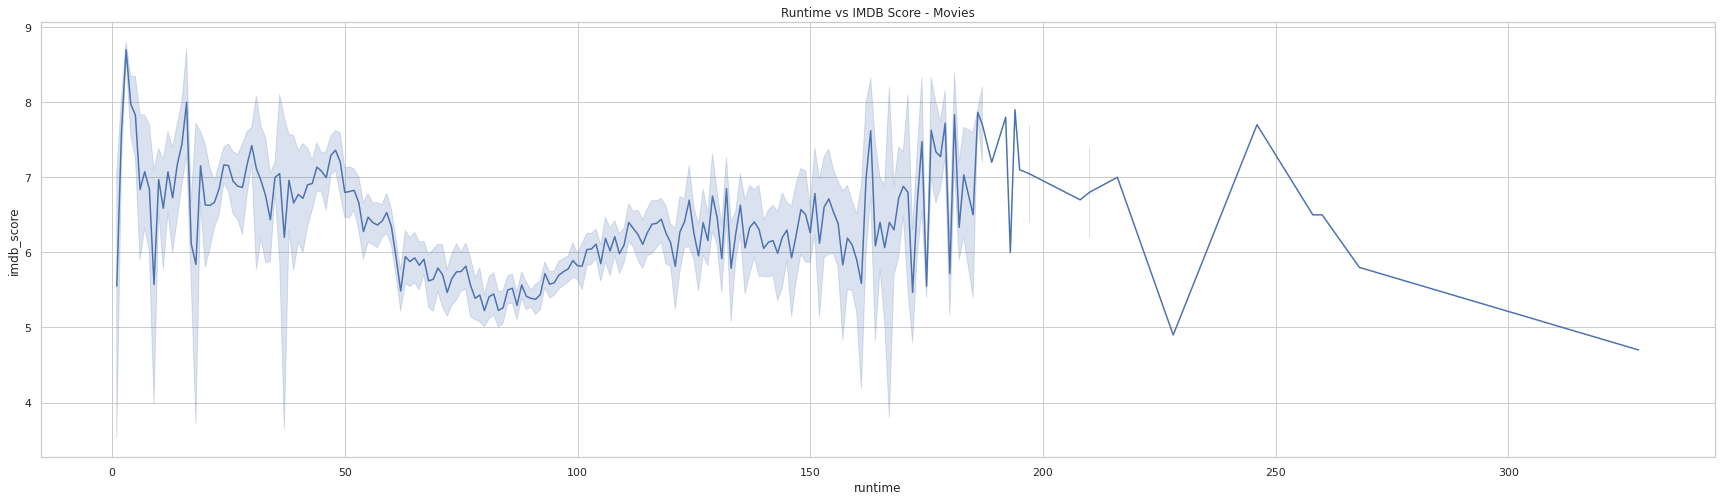

In [ ]:
mask = (titles['type']=='MOVIE')
plt.figure(figsize=(30,8))
sns.set_theme(style="whitegrid")
sns.lineplot(data=titles, x="runtime", y="imdb_score")
plt.title("Runtime vs IMDB Score - Movies")
plt.show()

Lets understand this graph **visually**: 
* Runtime between block around 55 till 100 is showing low score i.e., below 6 which is around 1 hour.
* Rutime post around 250 mins is showing reducing trend, which is almost 4 hrs.Note this is a movie!
* There is much fluctuation around 170 till 200 mins , which is in near range of 3 hrs.


Statistical Analysis

In [ ]:
# Lets divide a movie hours i.e 60,120,150,180,210,240,270,300,330 [ 1,2,2.5,3,2.5,4,4.5,5 and 5.5 hrs]
def get_movies_with_runtime(minruntime,maxruntime):
  mask = (titles['runtime']>minruntime) & (titles['runtime'])<=maxruntime & (titles['type']=='MOVIE')
  return titles[mask]

In [ ]:
min=0
for time in [60,120,150,180,210,240,270,300,330]:
  print("IMDB Score for movies = ",len(get_movies_with_runtime(min,time))," in runtime between ",min," ",time," = ",get_movies_with_runtime(min,time).describe()['imdb_score']['mean'])
  min = time

IMDB Score for movies =  5327  in runtime between  0   60  =  5.968410041841
IMDB Score for movies =  6291  in runtime between  60   120  =  6.083750675553952
IMDB Score for movies =  9318  in runtime between  120   150  =  5.95418312387792
IMDB Score for movies =  9722  in runtime between  150   180  =  5.966681969470902
IMDB Score for movies =  9853  in runtime between  180   210  =  5.974385964912277
IMDB Score for movies =  9868  in runtime between  210   240  =  5.976395480225987
IMDB Score for movies =  9869  in runtime between  240   270  =  5.976395480225987
IMDB Score for movies =  9870  in runtime between  270   300  =  5.976395480225987
IMDB Score for movies =  9870  in runtime between  300   330  =  5.976395480225987


We do one more check on popularity wrt runtime and conclude.

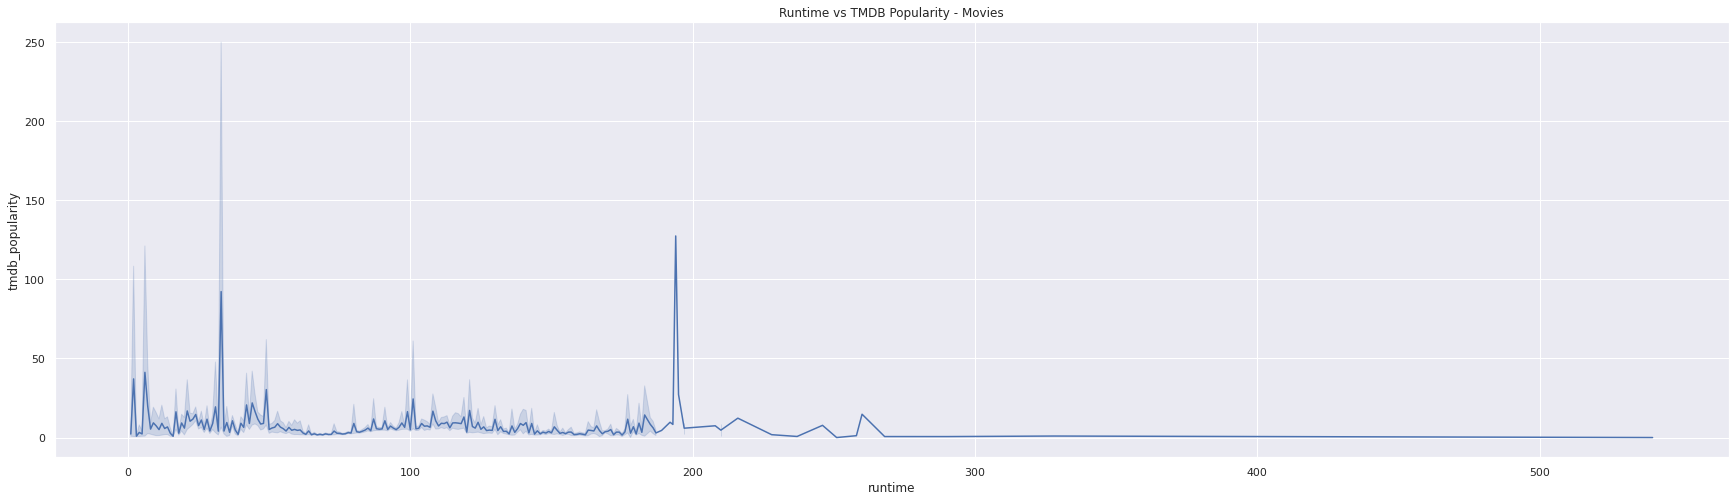

In [ ]:
mask = (titles['type']=='MOVIE')
plt.figure(figsize=(30,8))
sns.set_theme(style="darkgrid")
sns.lineplot(data=titles, x="runtime", y="tmdb_popularity")
plt.title("Runtime vs TMDB Popularity - Movies")
plt.show()

**Conclusion :** We don't have enough evidence to say that runtime is a deal for user experience or rating.**So User Ratings don't have an impact on the Runtime.**

#### 2.Genres vs Popularity - Movies

In [ ]:
titles = pd.read_csv('/content/drive/MyDrive/Datasets/Amazon Prime Data/titles.csv')
#Process the data to have column for each genre
titles = titles.assign(**dict([(_,0) for _ in genres]))

#Create new column for genres
import ast
titles_temp = titles
for index, row in titles_temp.iterrows():
    for genre in ast.literal_eval(row['genres']):
        titles_temp.at[index,genre] = 1

titles_temp

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,music,reality,western,action,horror,thriller,scifi,crime,history,romance
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,...,0,0,0,1,1,0,0,0,0,0
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,...,0,0,1,1,0,0,0,0,0,0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,...,0,0,0,0,0,0,0,0,0,1
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,...,0,0,0,0,0,0,0,0,0,1
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,...,0,0,0,0,0,0,0,0,0,0
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,...,0,0,0,0,0,0,0,0,0,0
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,...,0,0,0,0,0,0,0,1,0,0
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,...,0,0,0,0,0,0,0,0,0,0


Generate Year vs Popularity by Genre

In [ ]:
df = {}
genres = ['animation', 'family', 'thriller', 'crime', 'war', 'documentation', 'european', 'comedy', 'action', 'western', 'scifi', 'sport', 'music', 'drama', 'romance', 'history', 'reality', 'horror', 'fantasy']
for genre in genres:
  mask = (titles_temp['type']=='MOVIE') & (titles_temp[genre]==1) 
  temp_df = pd.DataFrame(titles_temp[mask].groupby('release_year').mean('tmdb_popularity')['tmdb_popularity'])
  df[genre] = temp_df.to_dict()

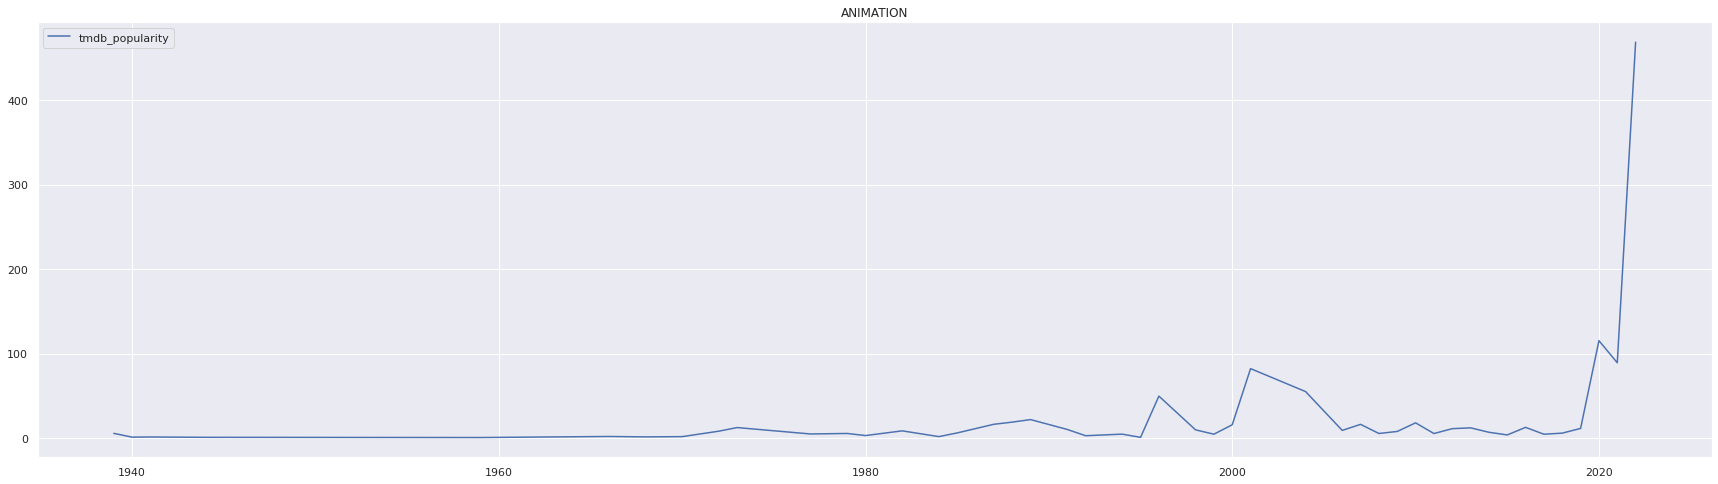

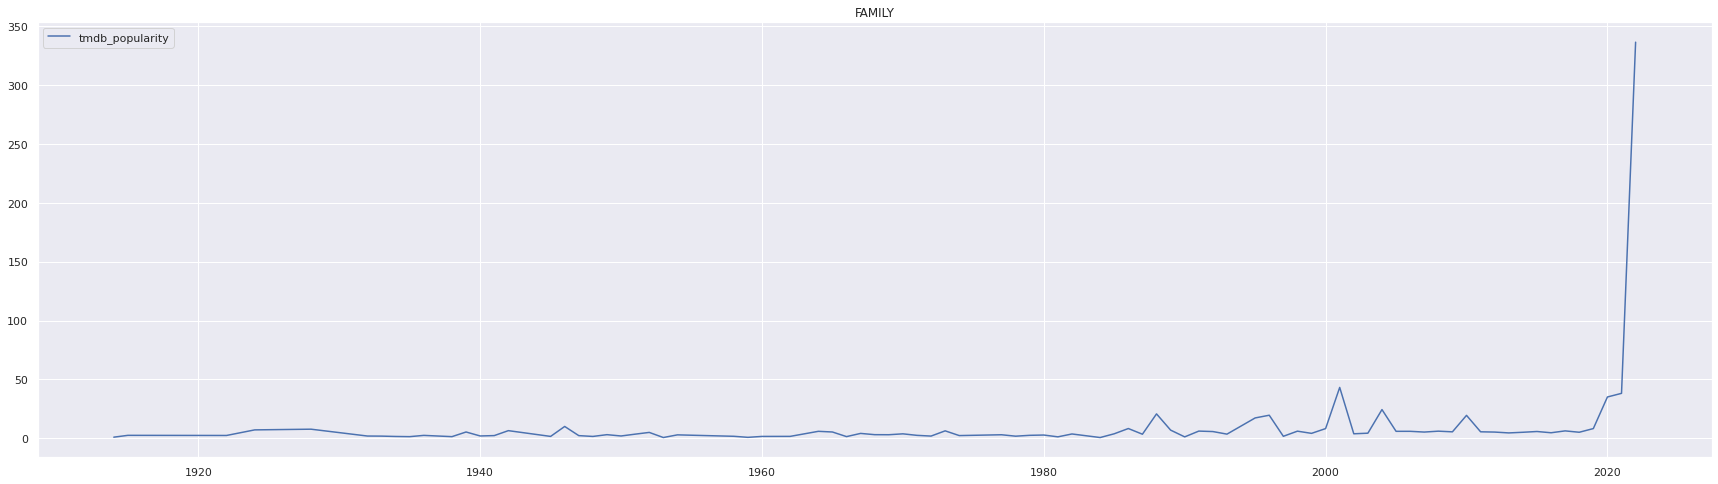

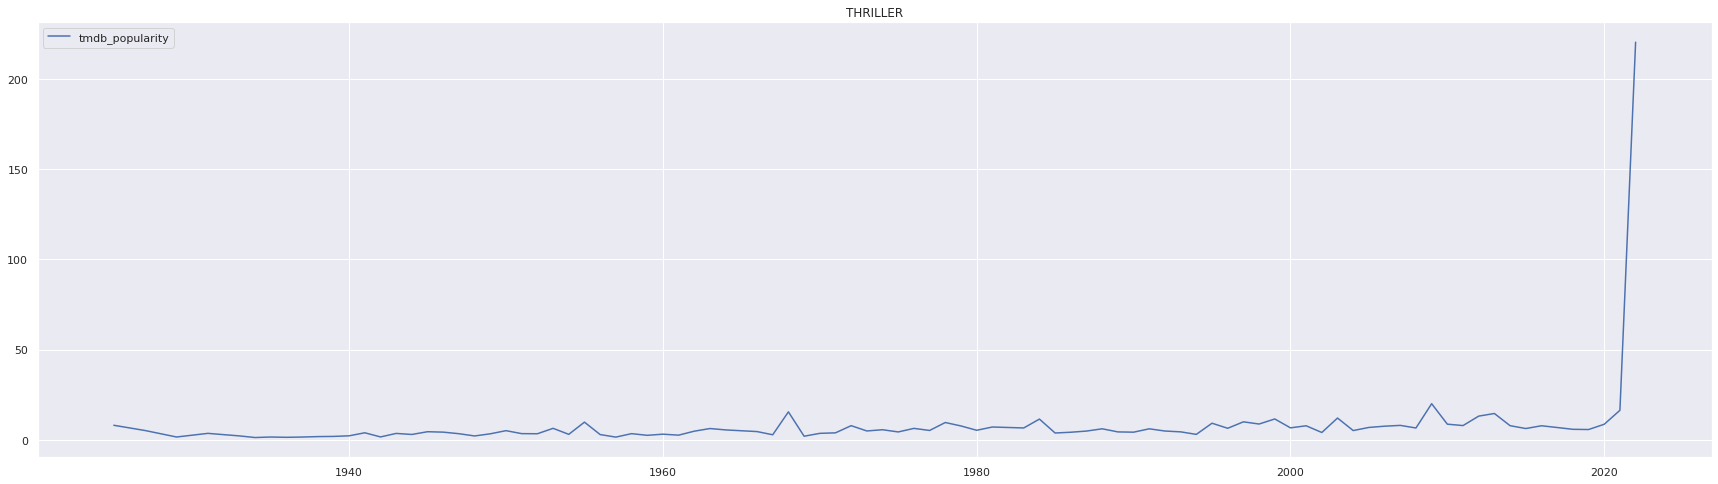

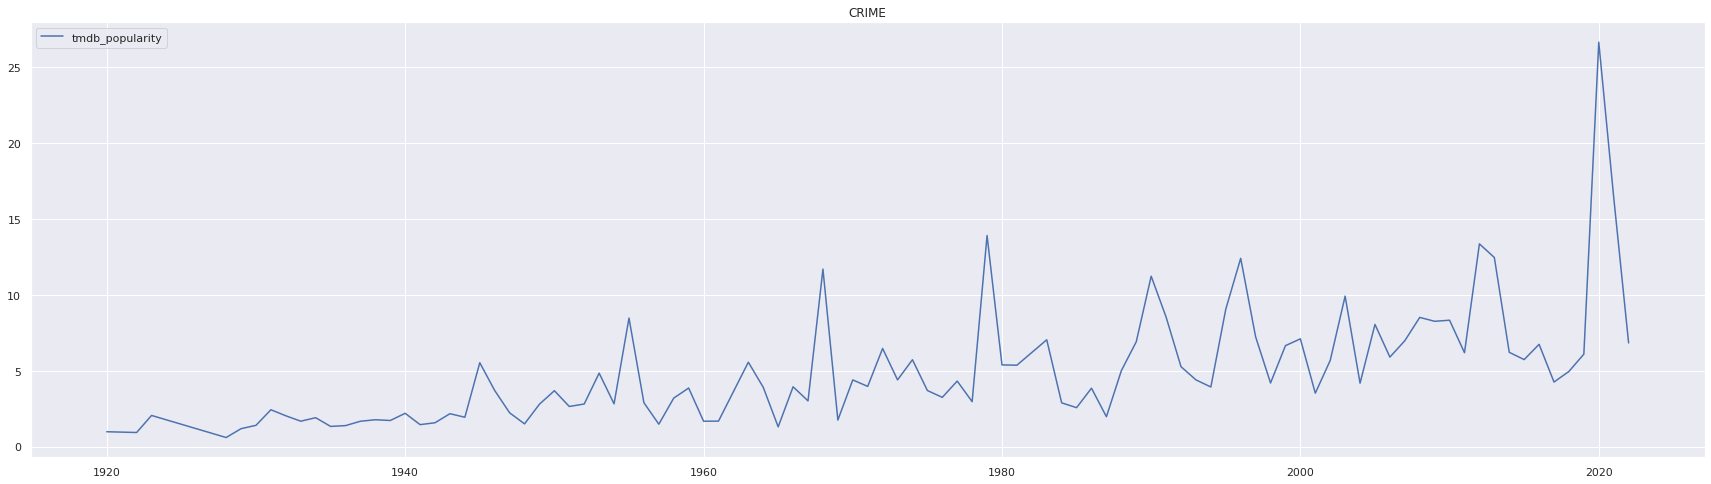

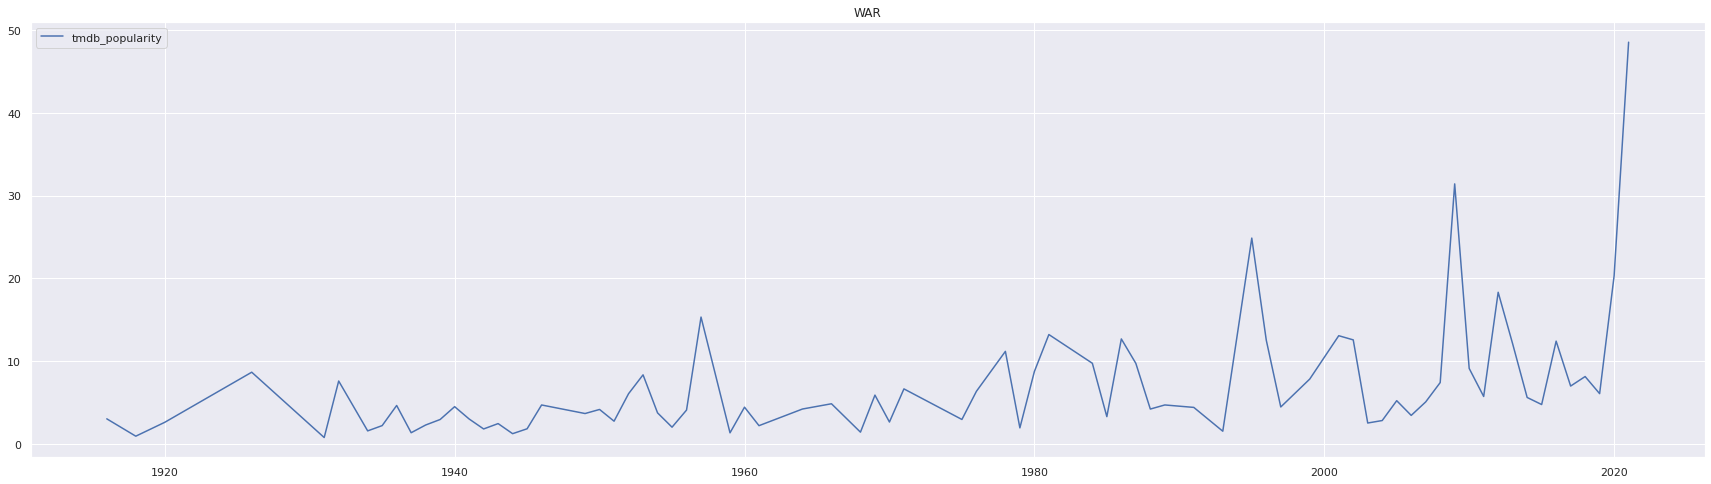

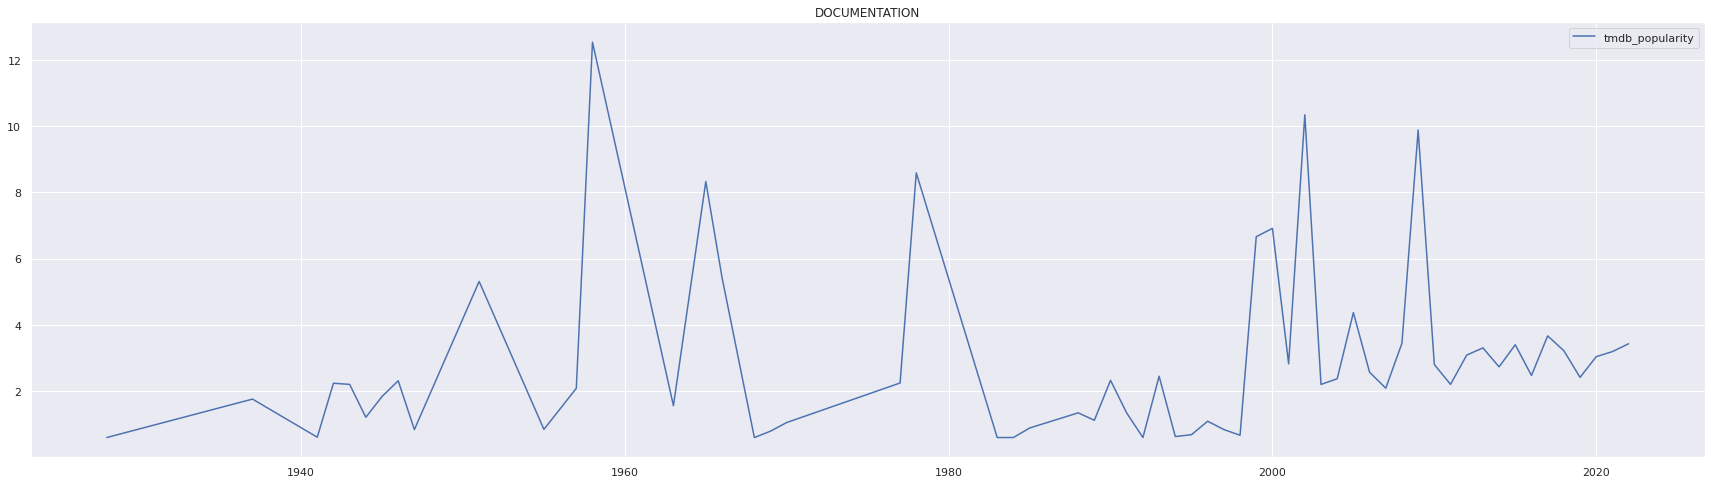

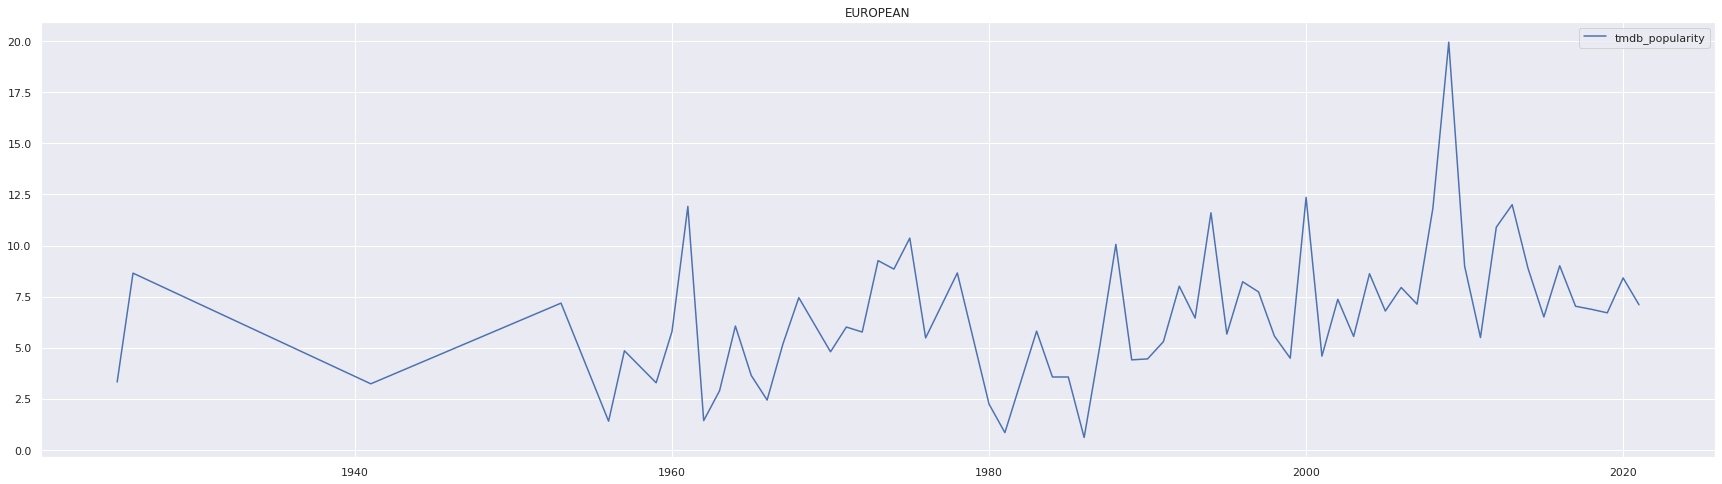

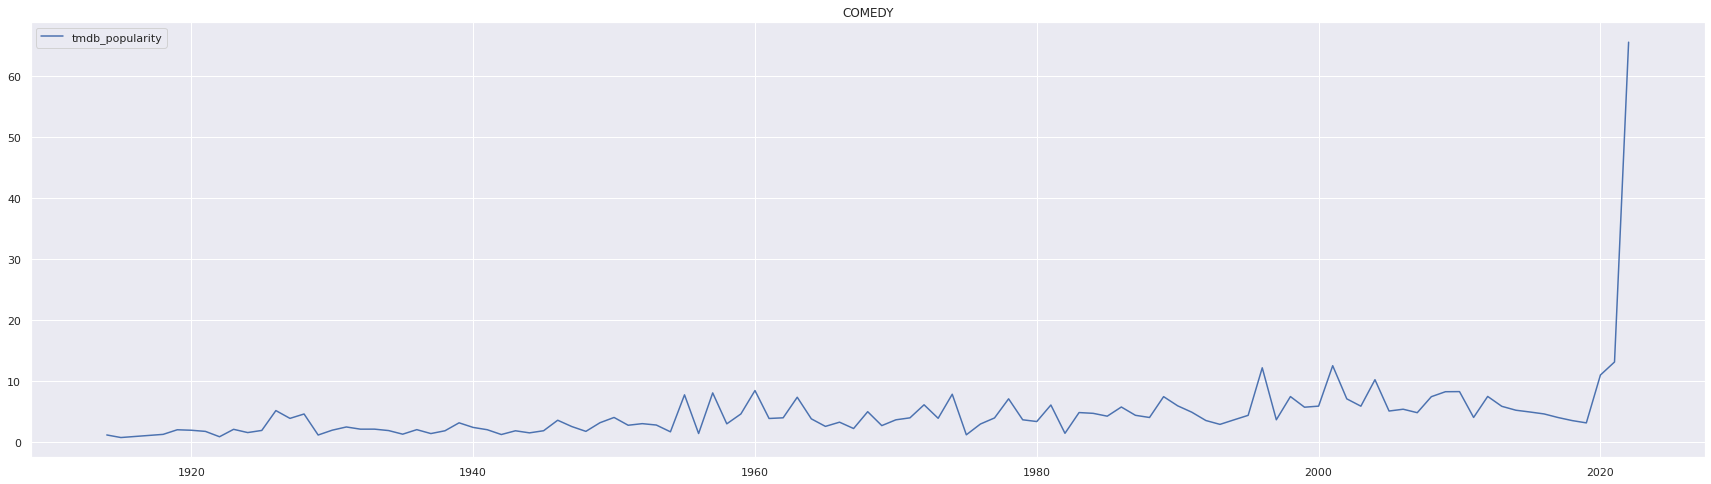

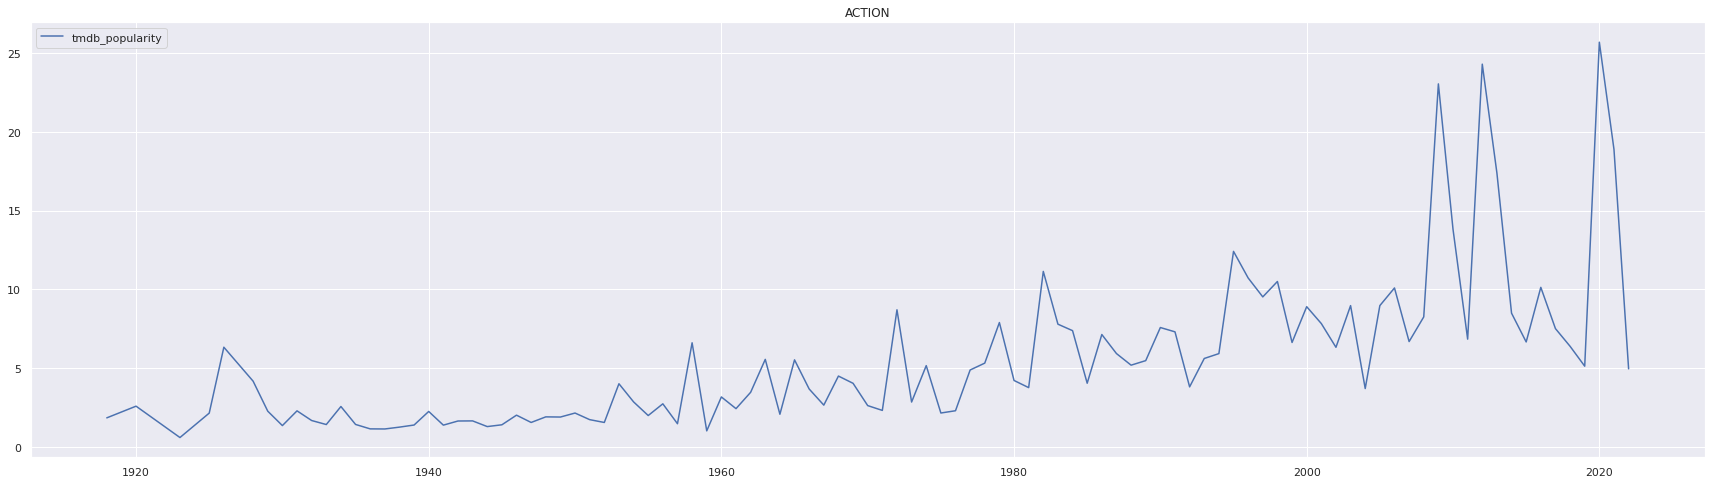

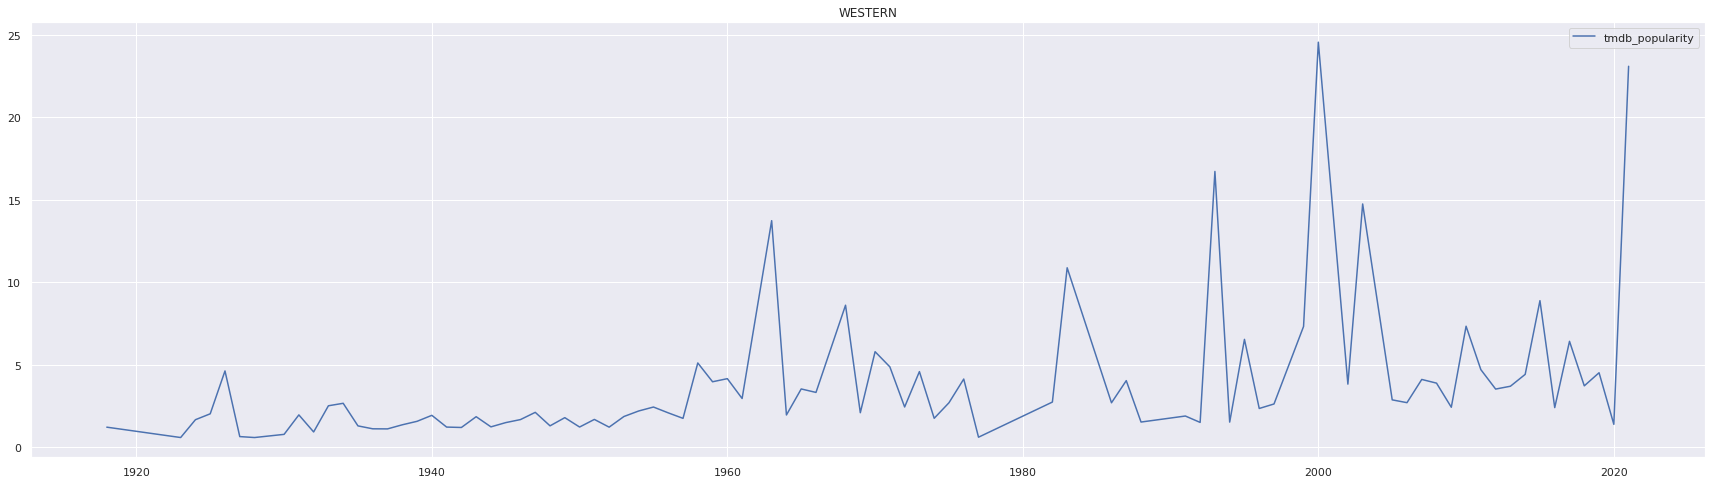

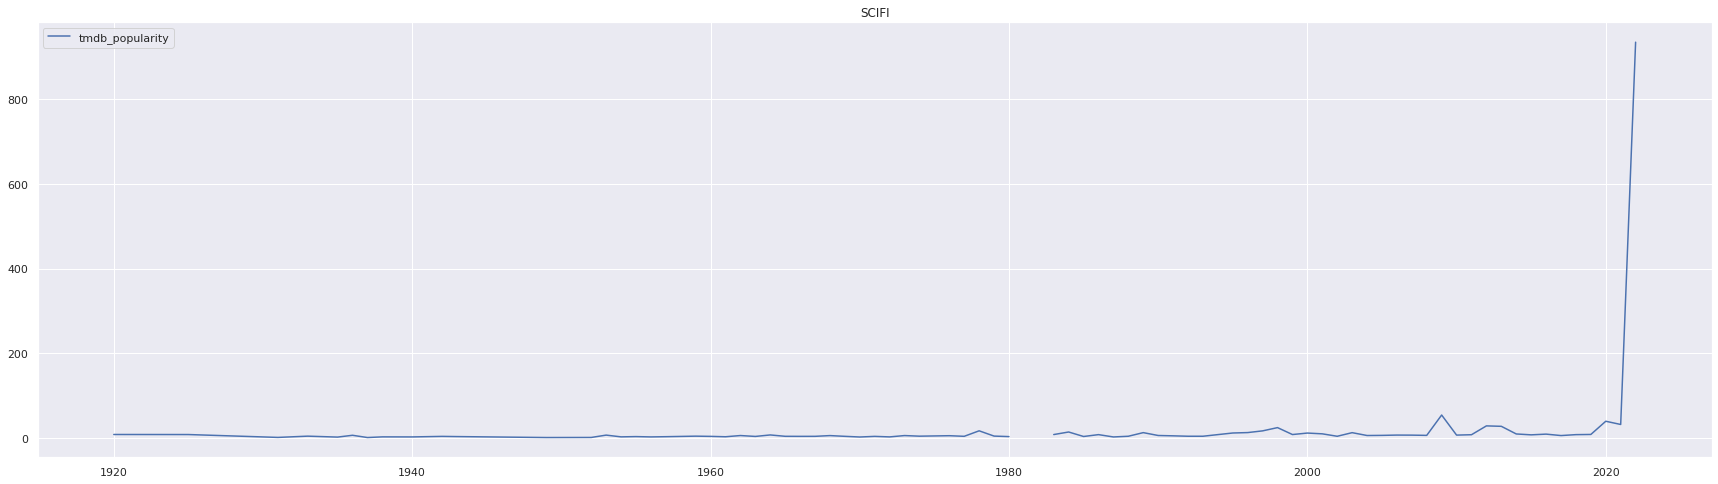

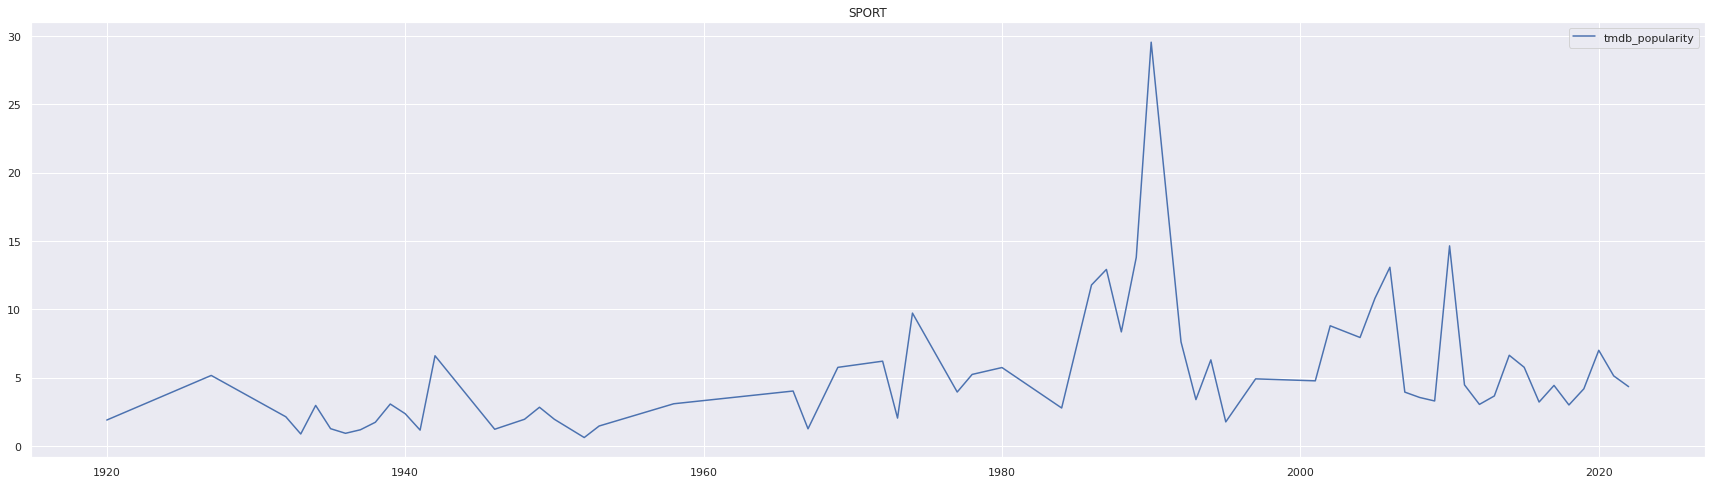

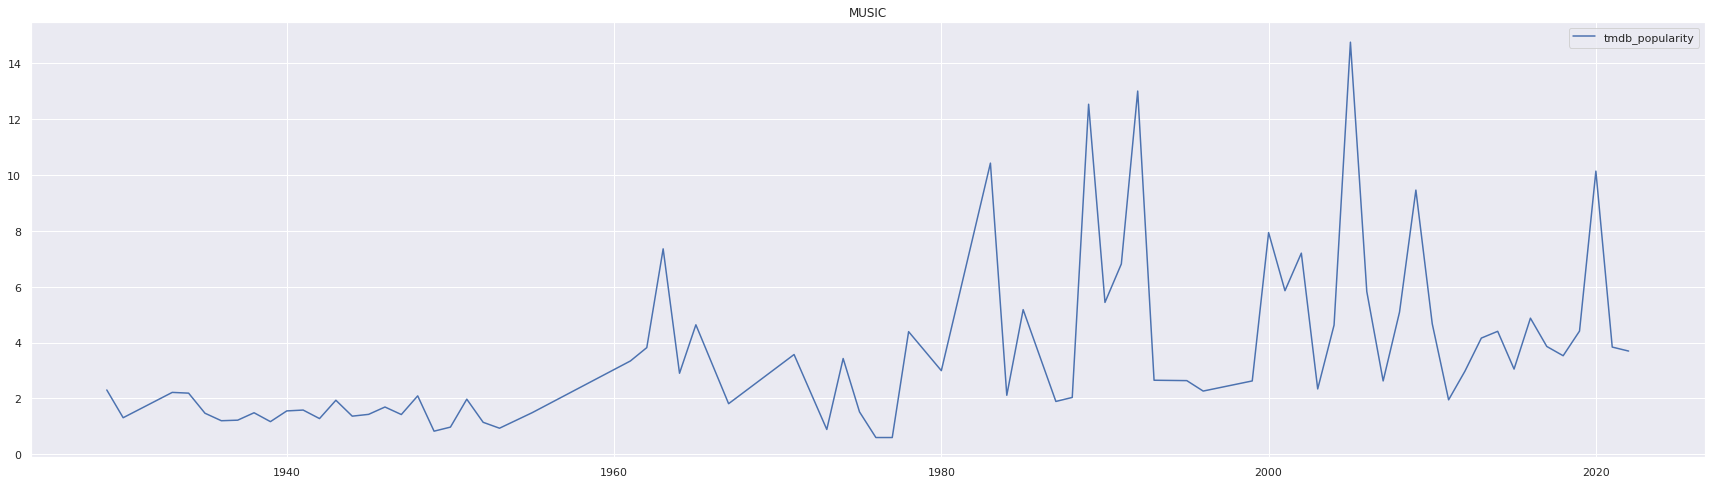

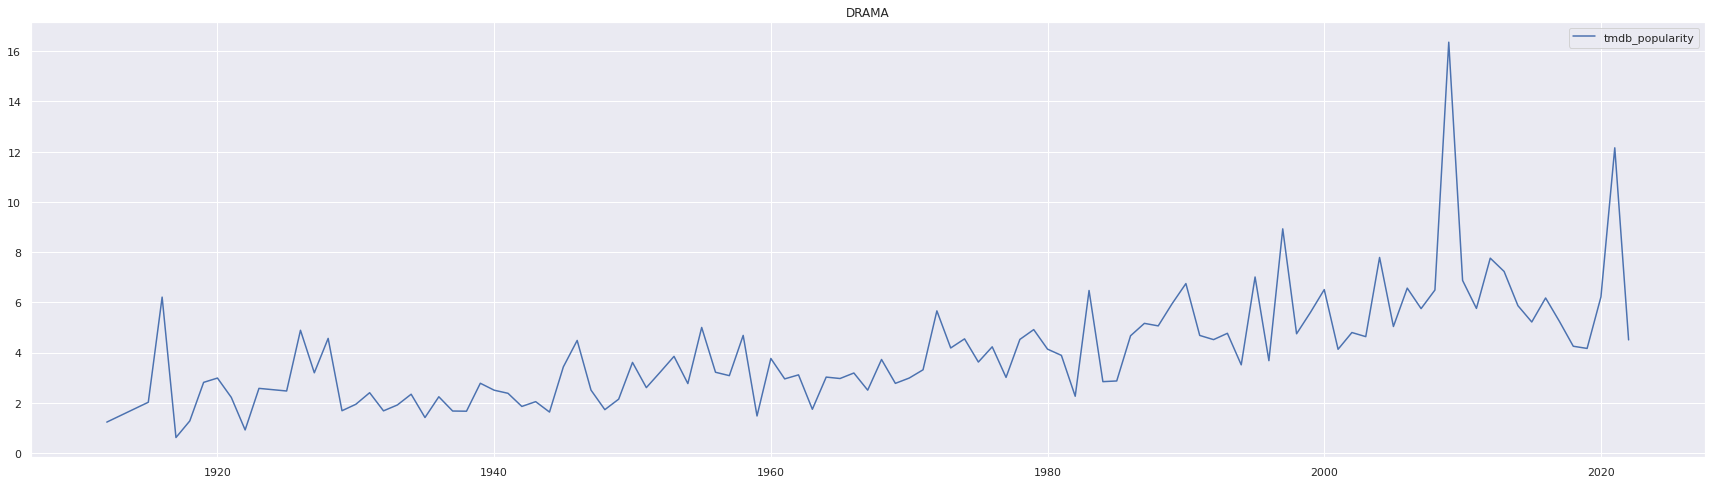

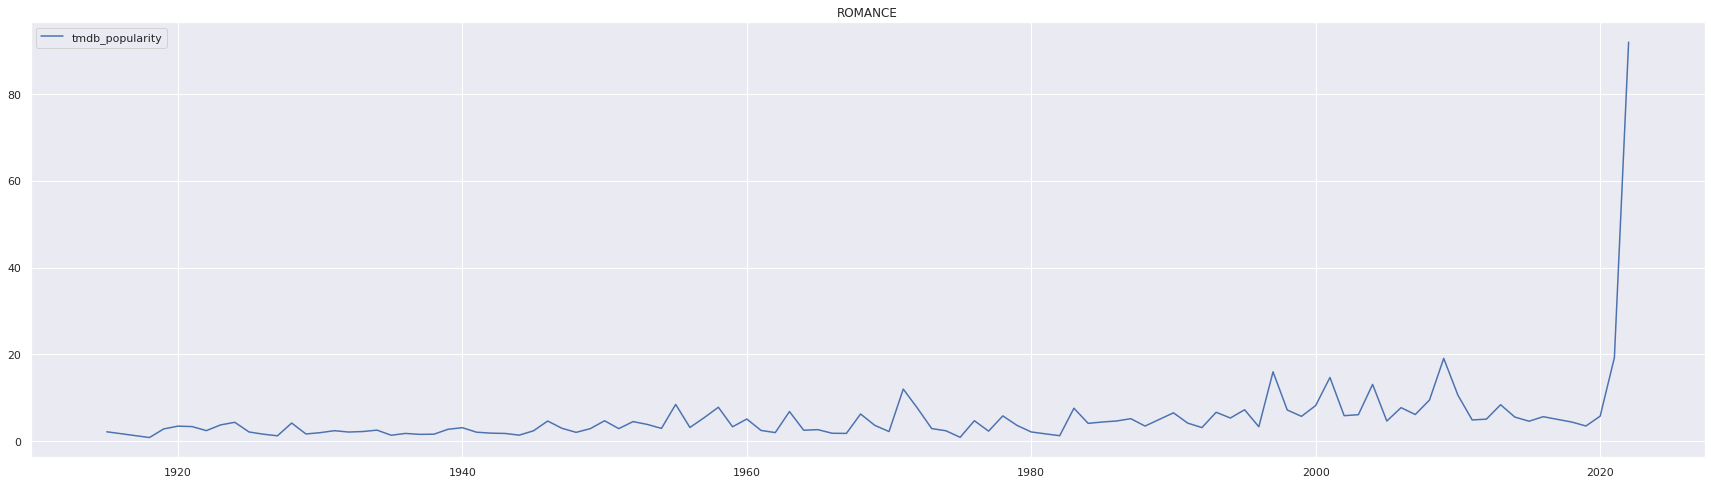

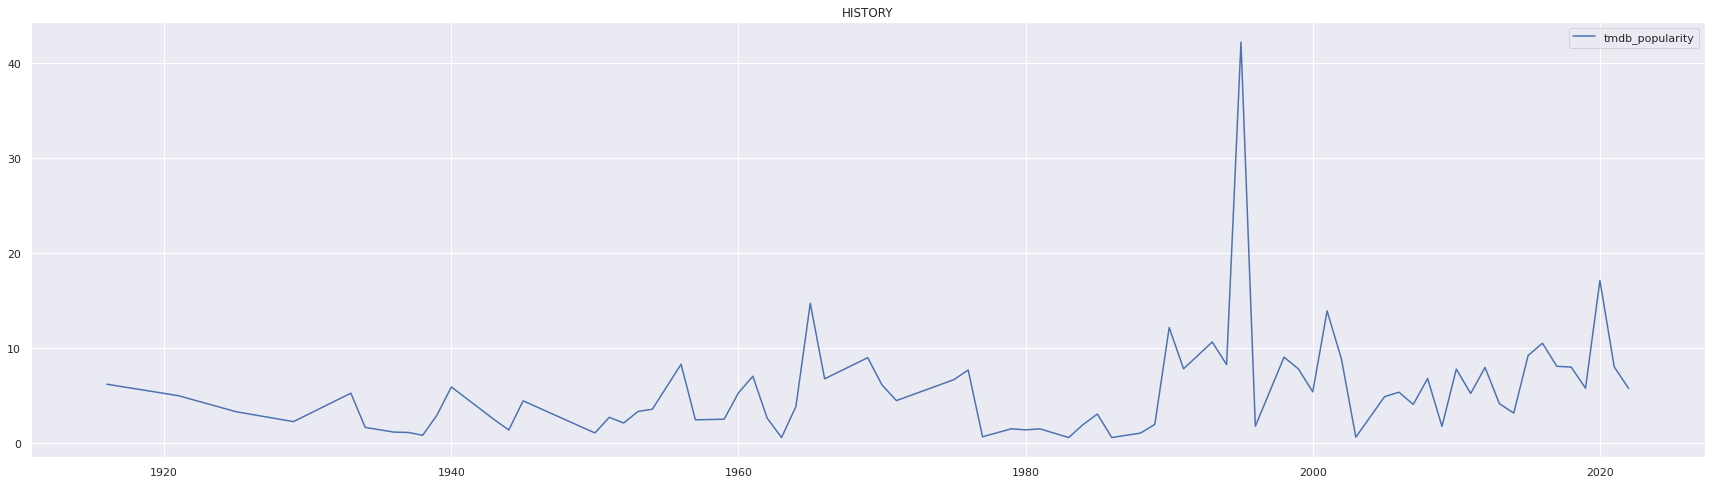

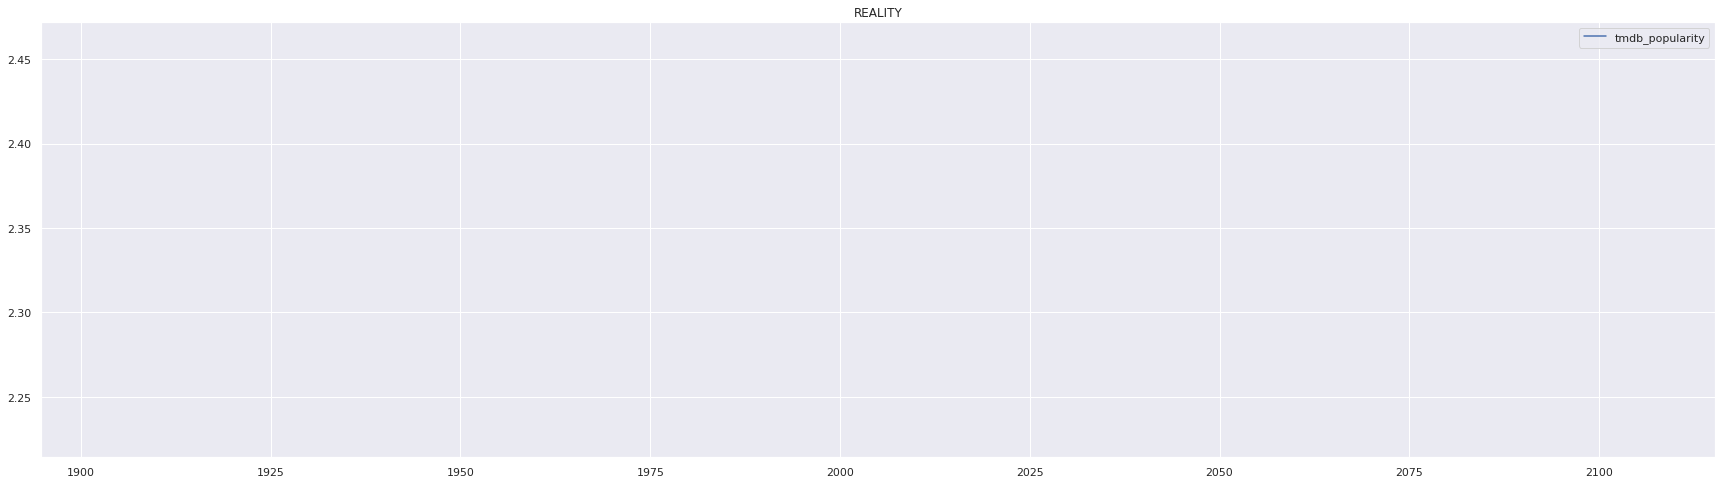

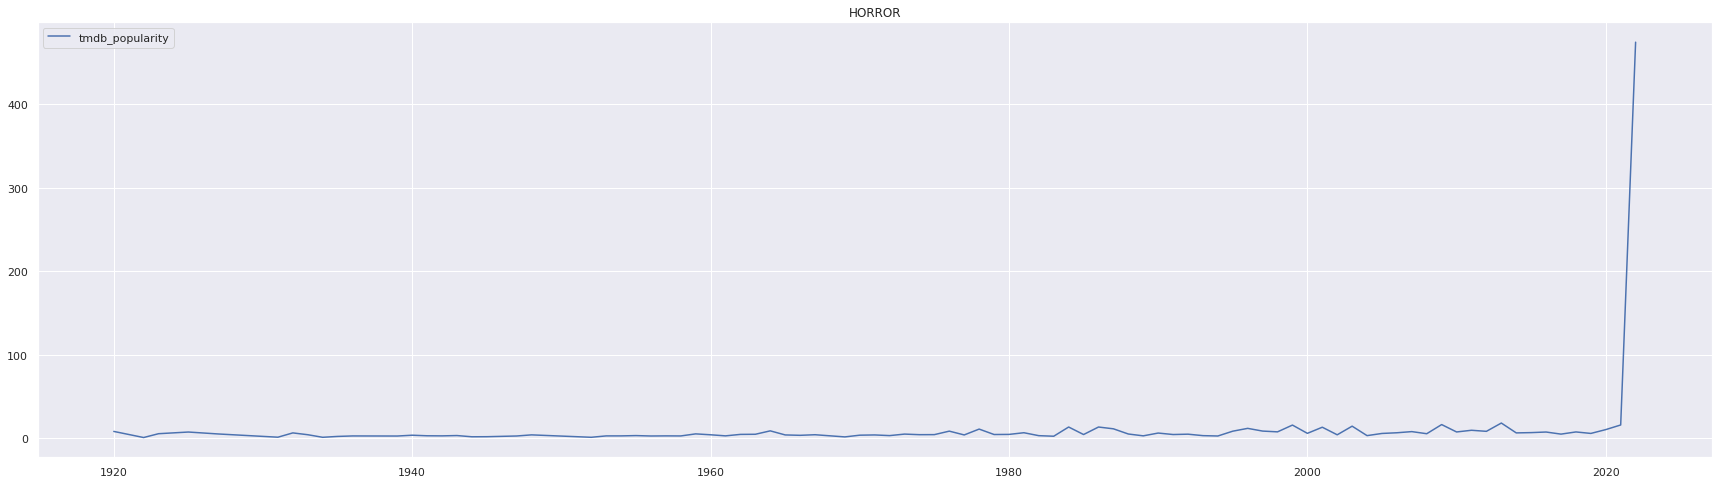

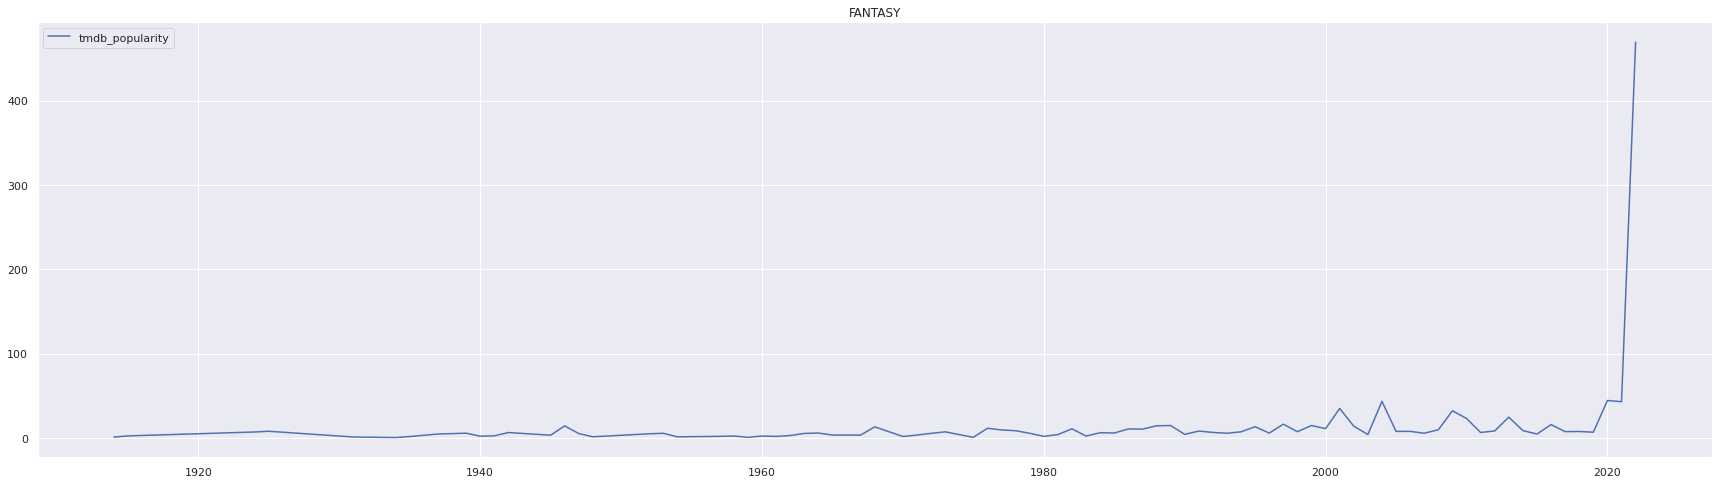

In [ ]:
plt.rcParams['figure.figsize'] = (30, 8)  
for genre in genres:
  pd.DataFrame(df[genre]).plot(kind='line')
  plt.title(genre.upper())
  plt.show()

Lets take 4 blocks before 1980 , 1980-2000 , 2000-2020 and > 2020

In [ ]:
data = {}
genres = ['animation', 'family', 'thriller', 'crime', 'war', 'documentation', 'european', 'comedy', 'action', 'western', 'scifi', 'sport', 'music', 'drama', 'romance', 'history', 'reality', 'horror', 'fantasy']
for genre in genres:
  mask_before_1980 = (titles_temp['type']=='MOVIE') & (titles_temp[genre]==1) & (titles_temp['release_year']<=1980)
  mask_btwn_1981_2000 = (titles_temp['type']=='MOVIE') & (titles_temp[genre]==1) & (titles_temp['release_year']>=1981) & (titles_temp['release_year']<=2000)
  mask_btwn_2001_2020 = (titles_temp['type']=='MOVIE') & (titles_temp[genre]==1) & (titles_temp['release_year']>=2001) & (titles_temp['release_year']<=2020)
  mask_after_2020 = (titles_temp['type']=='MOVIE') & (titles_temp[genre]==1) & (titles_temp['release_year']>=2021)
  
  t = {}
  t['1990'] = titles_temp[mask_before_1980].mean()['tmdb_popularity']
  t['2000'] = titles_temp[mask_btwn_1981_2000].mean()['tmdb_popularity']
  t['2020'] = titles_temp[mask_btwn_2001_2020].mean()['tmdb_popularity']
  t['2022'] = titles_temp[mask_after_2020].mean()['tmdb_popularity']

  data[genre] = t
genre_by_year = pd.DataFrame(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':
/usr/local/lib/python3.7/di

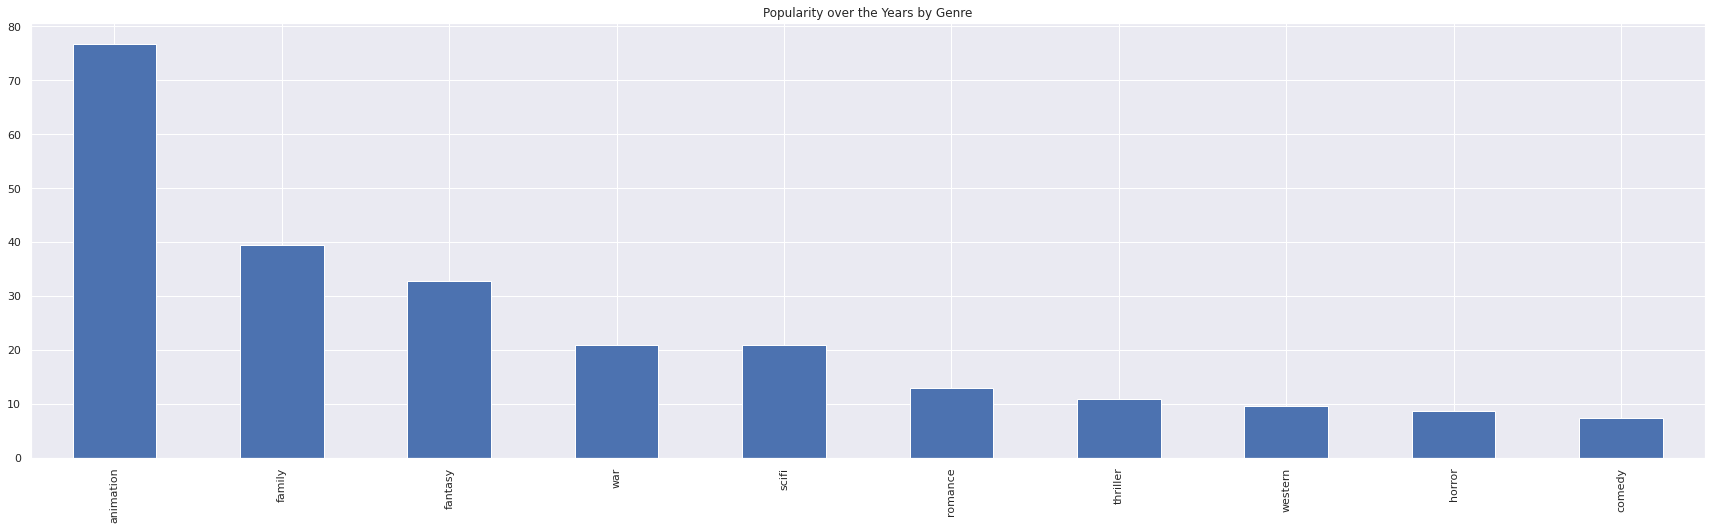

In [ ]:
plt.title("Popularity over the Years by Genre")
genre_by_year.describe().transpose()['std'].sort_values(ascending=False)[:10].plot(kind='bar')
plt.show()

The Graph clearly indicates that **"Animation"** genre is sharp growing/grown interest among the cinema lovers.

Does Covid had an impact on the popularity ?

We take data before 2020 and data post 2020 and see the variations, Since covid was started in December 2019 in China

In [ ]:
data = {}
genres = ['animation', 'family', 'thriller', 'crime', 'war', 'documentation', 'european', 'comedy', 'action', 'western', 'scifi', 'sport', 'music', 'drama', 'romance', 'history', 'reality', 'horror', 'fantasy']
for genre in genres:
  mask_before_2020 = (titles_temp['type']=='MOVIE') & (titles_temp[genre]==1) & (titles_temp['release_year']<=2020)
  mask_after_2020 = (titles_temp['type']=='MOVIE') & (titles_temp[genre]==1) & (titles_temp['release_year']>=2021)
  
  t = {}
  t['2020'] = titles_temp[mask_before_2020].mean()['tmdb_popularity']
  t['2022'] = titles_temp[mask_after_2020].mean()['tmdb_popularity']

  data[genre] = t
genre_covid_impact = pd.DataFrame(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


In [ ]:
t = genre_covid_impact.transpose()
t['Variation in %'] = ((t['2022'] - t['2020'])/t['2020']) * 100
t.sort_values(by='Variation in %',ascending=False)

,2020,2022,Variation in %
family,8.013376,85.267526,964.064975
western,2.342768,23.088556,885.524669
animation,16.812136,165.153100,882.344548
war,6.449619,48.549333,652.747301
fantasy,12.114670,74.639407,516.107636
romance,4.967879,30.558753,515.126711
scifi,11.318429,50.222755,343.725476
thriller,7.281528,27.949674,283.843502
comedy,5.070124,19.262565,279.922955
horror,7.347849,23.855522,224.659948


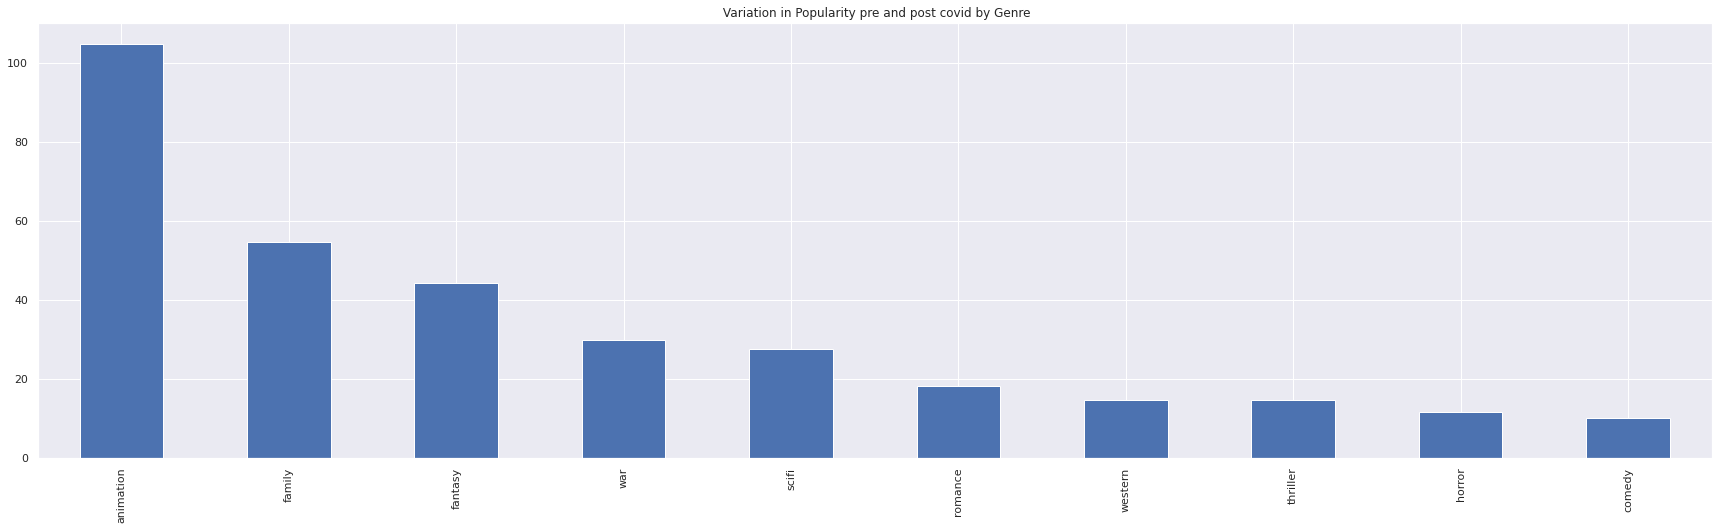

In [ ]:
plt.title(" Variation in Popularity pre and post covid by Genre")
genre_covid_impact.describe().transpose()['std'].sort_values(ascending=False)[:10].plot(kind='bar')
plt.show()

In [ ]:
genre_covid_impact

,animation,family,thriller,crime,war,documentation,european,comedy,action,western,scifi,sport,music,drama,romance,history,reality,horror,fantasy
2020,16.812136,8.013376,7.281528,6.537845,6.449619,3.069763,7.908927,5.070124,7.412553,2.342768,11.318429,5.017627,3.330871,5.023051,4.967879,6.529595,2.343,7.347849,12.114670
2022,165.153100,85.267526,27.949674,15.849621,48.549333,3.217150,7.100500,19.262565,17.830261,23.088556,50.222755,5.067000,3.822192,11.561434,30.558753,7.769529,NaN,23.855522,74.639407


Just look at the data before 2020 and after 2022 ,  the popularity for animation just went 10 times, almost every  genre shown an increase except a few : 

In [ ]:
genre_covid_impact.describe().transpose()['std'].sort_values()

sport              0.034912
documentation      0.104218
music              0.347417
european           0.571644
history            0.876766
drama              4.623335
crime              6.584420
action             7.366432
comedy            10.035571
horror            11.672688
thriller          14.614586
western           14.669487
romance           18.095480
scifi             27.509512
war               29.768993
fantasy           44.211666
family            54.626934
animation        104.892902
reality                 NaN
Name: std, dtype: float64

Sports is the least and Animation is the highest among the popularity.

#### 3.Analysis of People's Votes - Movies

In [ ]:
titles = pd.read_csv('/content/drive/MyDrive/Datasets/Amazon Prime Data/titles.csv')

Text(0.5, 1.0, 'IMDB Votes Count by YEAR')

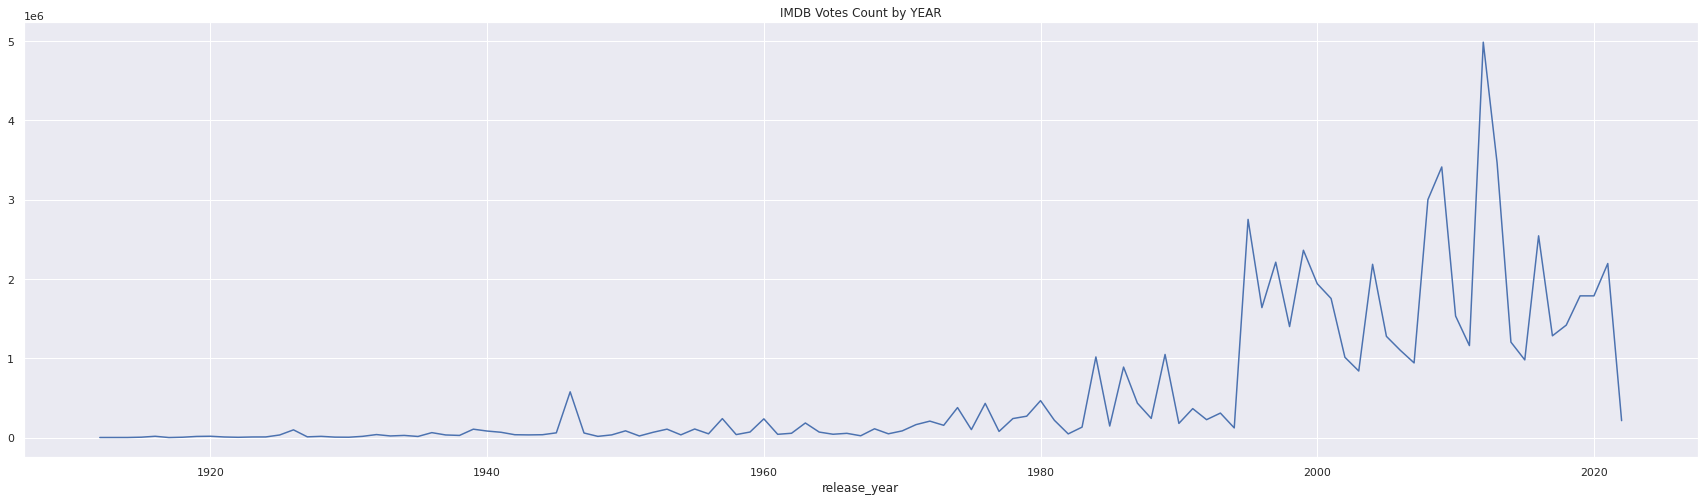

In [ ]:
mask = (titles['type']=='MOVIE')
titles[mask].groupby('release_year').sum('imdb_votes')['imdb_votes'].plot()
plt.title("IMDB Votes Count by YEAR")

It is very evident that before 2000, the participation got increased. Lets find out exactly where it is. Since we took sum of votes by year, we might get a biased result, lets take mean of each year to see.

In [ ]:
titles[mask].sort_values(by='imdb_votes',ascending=False)[:10][['title','release_year','imdb_votes']]

,title,release_year,imdb_votes
2220,Titanic,1997,1133692.0
2230,The Usual Suspects,1995,1059480.0
2237,Braveheart,1995,1016629.0
2229,The Sixth Sense,1999,967864.0
1814,The Terminator,1984,841706.0
4102,Skyfall,2012,684779.0
2824,District 9,2009,670344.0
5293,Arrival,2016,669220.0
2228,Fargo,1996,663221.0
2811,Shrek,2001,659470.0


Text(0.5, 1.0, 'IMDB Mean Votes Count by YEAR')

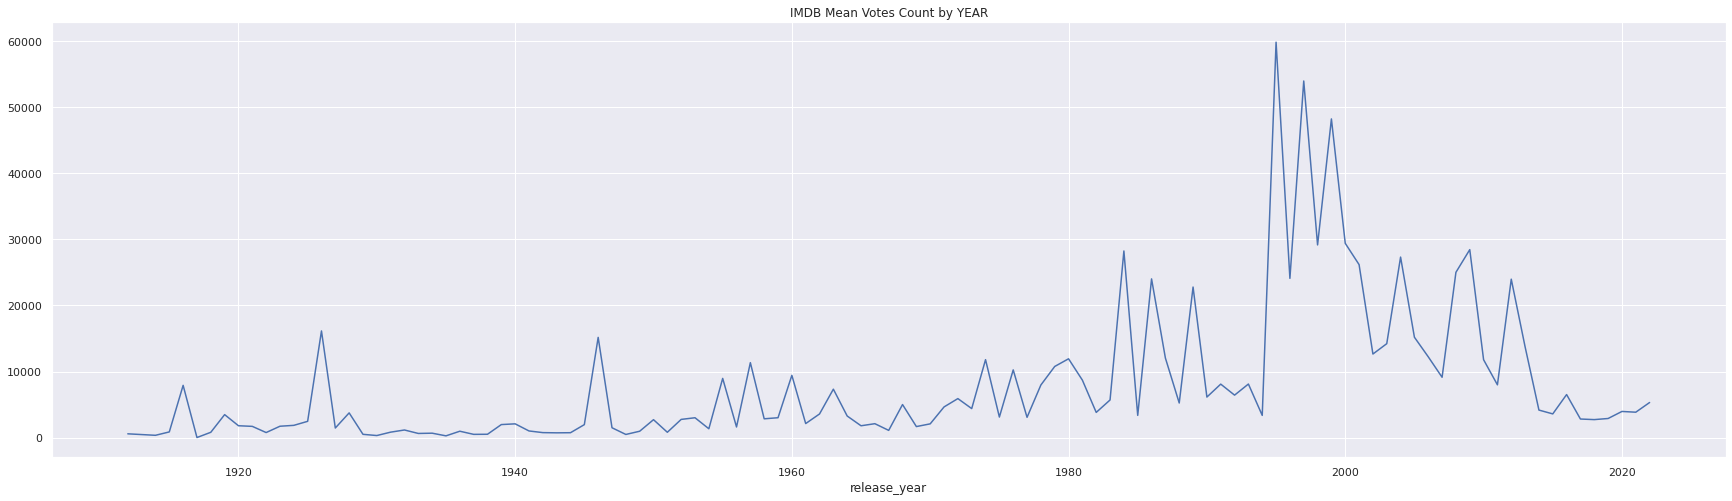

In [ ]:
mask = (titles['type']=='MOVIE')
titles[mask].groupby('release_year').mean('imdb_votes')['imdb_votes'].plot()
plt.title("IMDB Mean Votes Count by YEAR")

Text(0.5, 1.0, 'IMDB Mean Votes Count by YEAR')

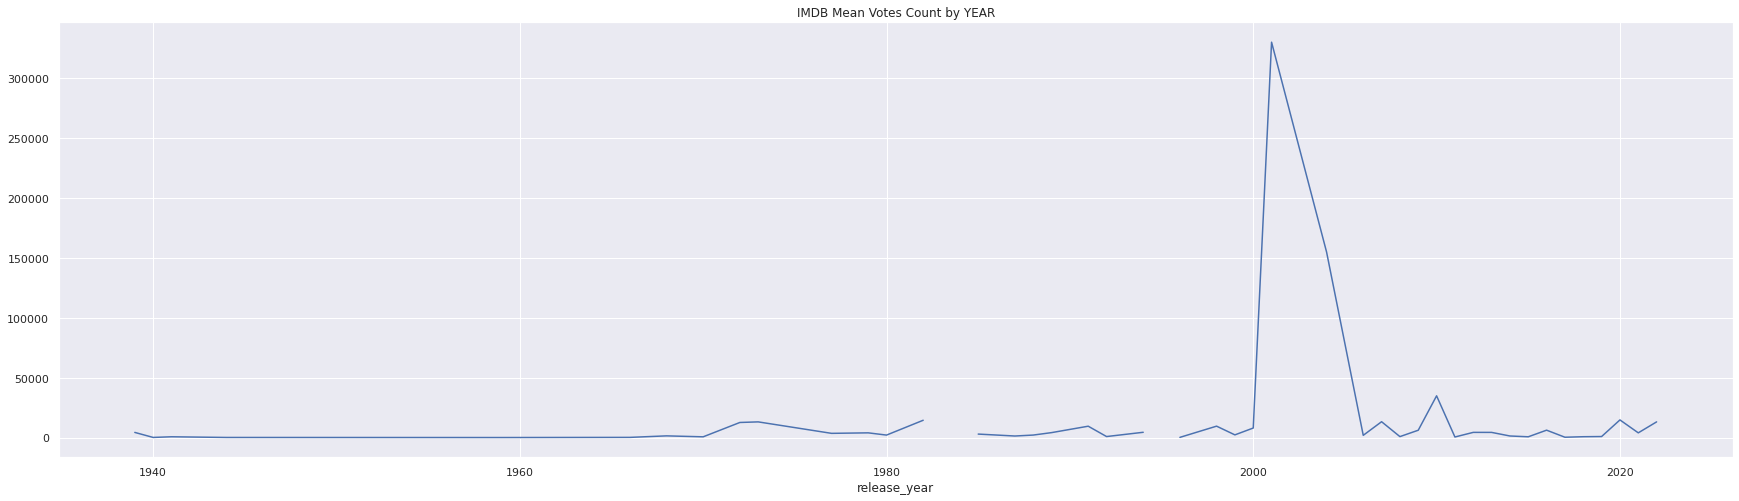

In [ ]:
mask = (titles_temp['type']=='MOVIE') &  (titles_temp['animation']==1)
titles_temp[mask].groupby('release_year').mean('imdb_votes')['imdb_votes'].plot()
plt.title("IMDB Mean Votes Count by YEAR")

The Movie Titanic still is the most voted movie on IMDB.

Variation in ratings in IMDB vs TMDB

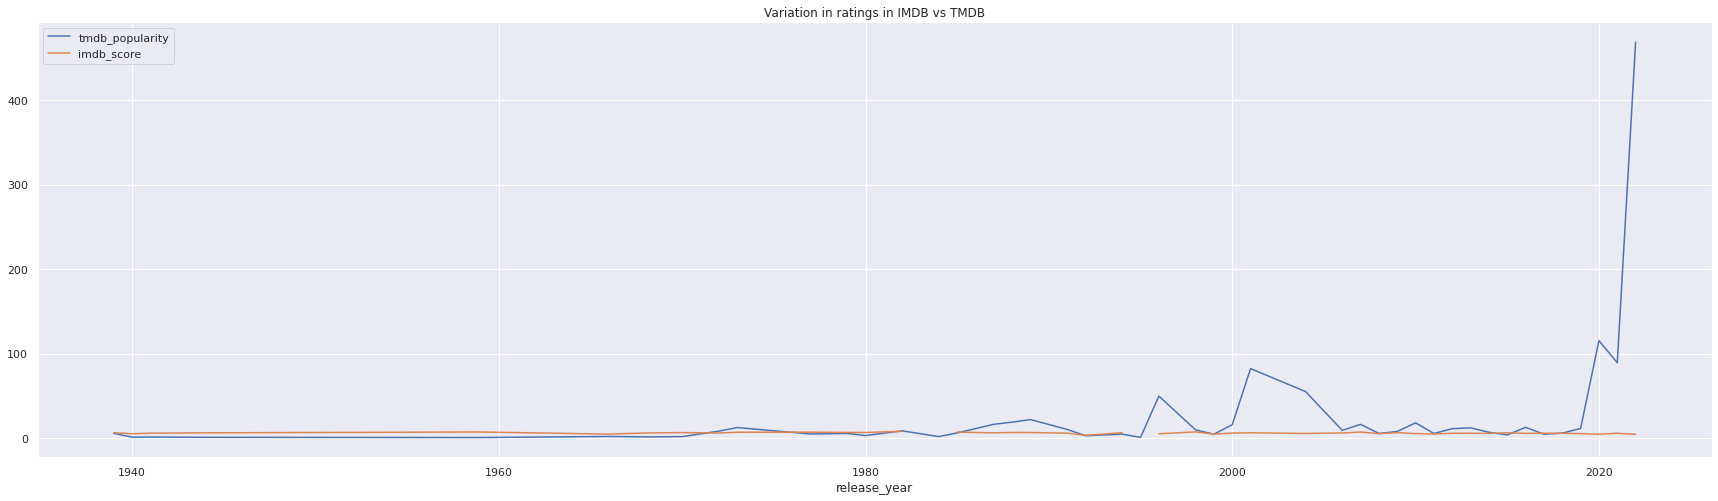

In [ ]:
titles[mask].groupby('release_year').mean('imdb_votes')[['tmdb_popularity','imdb_score']].plot()
plt.title("Variation in ratings in IMDB vs TMDB")
plt.show()

Top Voted Action Movies

In [ ]:
mask = (titles_temp['type']=='MOVIE') & (titles_temp['action']==1)
titles_temp[mask].sort_values(by='imdb_votes',ascending=False)[:10][['title','release_year','imdb_votes']]

,title,release_year,imdb_votes
1814,The Terminator,1984,841706.0
4102,Skyfall,2012,684779.0
2824,District 9,2009,670344.0
4581,World War Z,2013,648063.0
4103,Prometheus,2012,598691.0
2821,Taken,2008,593358.0
2232,Independence Day,1996,562806.0
4588,Star Trek Into Darkness,2013,479226.0
2218,The Fifth Element,1997,463640.0
2231,Armageddon,1998,419102.0


In [ ]:
mask = (titles_temp['type']=='MOVIE') & (titles_temp['animation']==1)
titles_temp[mask].sort_values(by='imdb_votes',ascending=False)[:10][['title','release_year','imdb_votes']]

,title,release_year,imdb_votes
2811,Shrek,2001,659470.0
2826,Shrek 2,2004,451908.0
2857,Shrek Forever After,2010,200354.0
7421,Sonic the Hedgehog,2020,126887.0
5311,Teenage Mutant Ninja Turtles: Out of the Shadows,2016,91788.0
8964,Hotel Transylvania: Transformania,2022,26244.0
2968,Evangelion: 1.0 You Are (Not) Alone,2007,23175.0
2984,Evangelion: 2.0 You Can (Not) Advance,2009,20803.0
984,Charlotte's Web,1973,20402.0
5340,Monster Trucks,2016,17017.0


### 4.Runtime Analysis

In [ ]:
mask = (titles_temp['type']=='MOVIE') & (titles_temp['action']==1) & (titles_temp['thriller']==1)
titles_temp[mask].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_year,590.0,2004.772881,19.803001,1932.000000,1998.000,2013.000,2018.0000,2022.000
runtime,590.0,107.116949,27.016028,4.000000,90.000,98.000,123.0000,181.000
seasons,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imdb_score,584.0,5.447089,1.386417,1.600000,4.475,5.500,6.5000,8.700
imdb_votes,584.0,24331.794521,80199.959119,5.000000,514.500,2012.500,10984.0000,841706.000
tmdb_popularity,583.0,11.909563,24.378820,0.000153,2.313,4.708,10.2815,201.232
tmdb_score,557.0,5.690485,1.294245,1.000000,4.800,5.900,6.6000,10.000
comedy,590.0,0.147458,0.354862,0.000000,0.000,0.000,0.0000,1.000
fantasy,590.0,0.059322,0.236427,0.000000,0.000,0.000,0.0000,1.000
war,590.0,0.045763,0.209147,0.000000,0.000,0.000,0.0000,1.000


In [ ]:
mask = (titles_temp['type']=='MOVIE') & (titles_temp['action']==1) & (titles_temp['thriller']==1)
print(" Action Thrillers")
print(titles_temp[mask].groupby('release_year').mean('imdb_score')[['imdb_score']].describe().transpose()['mean'])
print(" Action ")
mask = (titles_temp['type']=='MOVIE') & (titles_temp['action']==1)
print(titles_temp[mask].groupby('release_year').mean('imdb_score')[['imdb_score']].describe().transpose()['mean'])

 Action Thrillers
imdb_score    5.586637
Name: mean, dtype: float64
 Action 
imdb_score    5.634726
Name: mean, dtype: float64


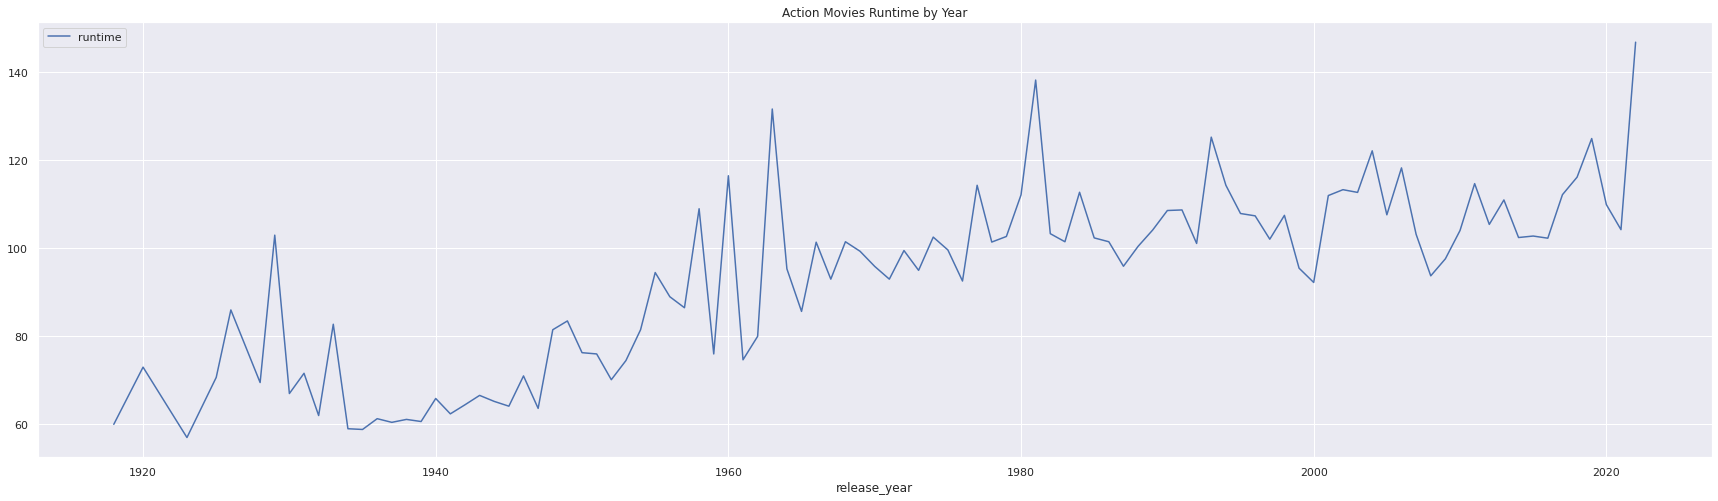

In [ ]:
mask = (titles_temp['type']=='MOVIE') & (titles_temp['action']==1)
titles_temp[mask].groupby('release_year').mean('runtime')[['runtime']].plot()
plt.title("Action Movies Runtime by Year")
plt.show()

In [ ]:
data = {}
genres = ['animation', 'family', 'thriller', 'crime', 'war', 'documentation', 'european', 'comedy', 'action', 'western', 'scifi', 'sport', 'music', 'drama', 'romance', 'history', 'reality', 'horror', 'fantasy']
for genre in genres:
  mask_before_1980 = (titles_temp['type']=='MOVIE') & (titles_temp[genre]==1) & (titles_temp['release_year']<=1980)
  mask_btwn_1981_2000 = (titles_temp['type']=='MOVIE') & (titles_temp[genre]==1) & (titles_temp['release_year']>=1981) & (titles_temp['release_year']<=2000)
  mask_btwn_2001_2020 = (titles_temp['type']=='MOVIE') & (titles_temp[genre]==1) & (titles_temp['release_year']>=2001) & (titles_temp['release_year']<=2020)
  mask_after_2020 = (titles_temp['type']=='MOVIE') & (titles_temp[genre]==1) & (titles_temp['release_year']>=2021)
  
  t = {}
  t['1980'] = titles_temp[mask_before_1980].mean()['runtime']
  t['2000'] = titles_temp[mask_btwn_1981_2000].mean()['runtime']
  t['2020'] = titles_temp[mask_btwn_2001_2020].mean()['runtime']
  t['2022'] = titles_temp[mask_after_2020].mean()['runtime']

  data[genre] = t
genre_by_year = pd.DataFrame(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':
/usr/local/lib/python3.7/di

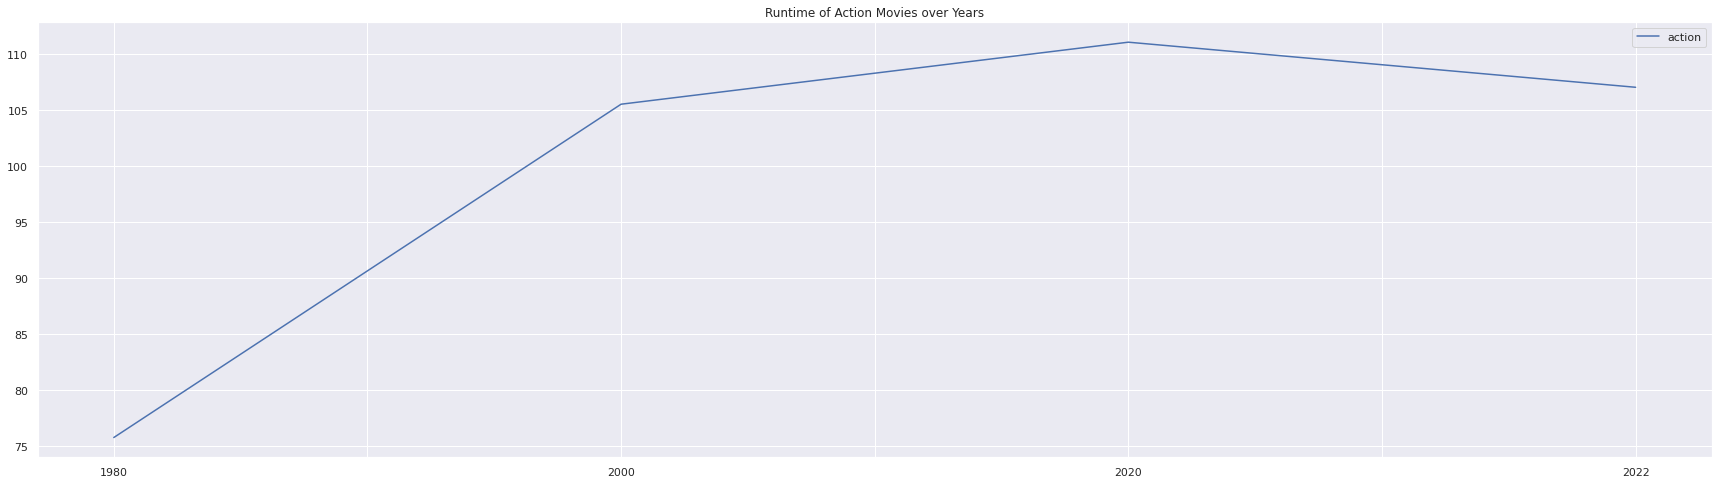

In [ ]:
genre_by_year[['action']].plot()
plt.title("Runtime of Action Movies over Years")
plt.show()

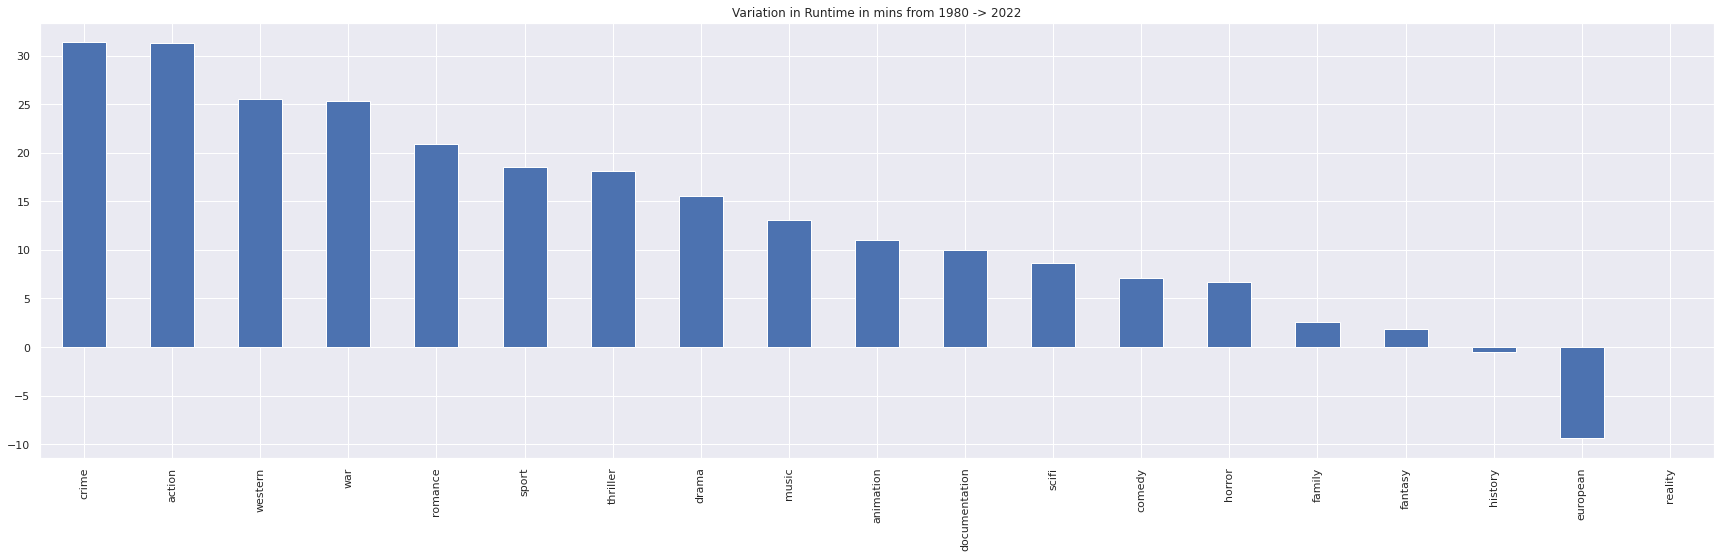

In [ ]:
tem = genre_by_year.transpose()
tem['Variation in Runtime in mins from 1980 -> 2022'] = round(tem['2022'] - tem['1980'],2)
tem['Variation in Runtime in mins from 1980 -> 2022'].sort_values(ascending=False)
tem['Variation in Runtime in mins from 1980 -> 2022'].sort_values(ascending=False).plot(kind='bar')
plt.title("Variation in Runtime in mins from 1980 -> 2022")
plt.show()

#<font color='blue'>**PART - II Content Based Recommendation**
---

So to define a proper content based system ,instead of relying solely on one parameter , We consider 3 i.e Plot of the story, genre of the story and the production country as well.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
movies_data = titles[['id','title','description','genres','production_countries']]

In [ ]:
def build_hybrid_recommender():
  

  tfidf = TfidfVectorizer(stop_words='english')
  

  # Description of the Movie 
  movies_data['description'] = movies_data['description'].fillna('')
  description_matrix = tfidf.fit_transform(movies_data['description'])
  similarity_matrix_description = linear_kernel(description_matrix,description_matrix)

  #Genre Based 
  movies_data['genres'] = movies_data['genres'].apply(lambda x: x.replace('[','').replace(']','').replace(',','').replace("'",""))
  movies_data['genres'] = movies_data['genres'].fillna('')
  genre_matrix = tfidf.fit_transform(movies_data['genres'])
  similarity_matrix_genre = linear_kernel(genre_matrix,genre_matrix)

  #Country Based
  movies_data['production_countries'] = movies_data['production_countries'].apply(lambda x: x.replace('[','').replace(']','').replace(',','').replace("'",""))
  movies_data['production_countries'] = movies_data['production_countries'].fillna('NA')
  country_matrix = tfidf.fit_transform(movies_data['production_countries'])
  similarity_matrix_country = linear_kernel(country_matrix,country_matrix)

  return similarity_matrix_description,similarity_matrix_genre,similarity_matrix_country

In [ ]:
similarity_matrix_description,similarity_matrix_genre,similarity_matrix_country = build_hybrid_recommender()

In [ ]:
def get_id_by_movie_name(movie):
  print(movies_data.loc[movies_data['title'] == movie, 'id'].values[0])
  return movies_data.loc[movies_data['title'] == movie, 'id'].values[0]

In [ ]:
pd.set_option('display.max_colwidth', None)
def get_description_of_movie(movie):
  return movies_data.loc[movies_data['title'] == movie, 'description']

In [ ]:
def get_recommendation(movie_input,similarity_matrix_description,similarity_matrix_genre,similarity_matrix_country,max_per_type):

  mapping = pd.Series(movies_data.index,index = movies_data['title'])
  movie_index = mapping[movie_input]
  #similarity_matrix_description,similarity_matrix_genre,similarity_matrix_country = build_hybrid_recommender()

  # Generate Movies based on Description
  similarity_score = list(enumerate(similarity_matrix_description[movie_index]))
  similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
  similarity_score = similarity_score[1:max_per_type]
  movie_indices_description = [i[0] for i in similarity_score]

  # Generate Movies based on Genre
  similarity_score = list(enumerate(similarity_matrix_genre[movie_index]))
  similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
  similarity_score = similarity_score[1:max_per_type]
  movie_indices_genre = [i[0] for i in similarity_score]

  # Generate Movies based on Genre
  # similarity_score = list(enumerate(similarity_matrix_country[movie_index]))
  # similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
  # similarity_score = similarity_score[1:max_per_type]
  # movie_indices_country = [i[0] for i in similarity_score]

  # print("By Description = ",movie_indices_description)
  # print("By Genre = ",movie_indices_genre)
  # print("By Country = ",movie_indices_country)
  #common_indices = list(set(movie_indices_description).intersection(set(movie_indices_genre)).intersection(set(movie_indices_country)) )
  common_indices = list(set(movie_indices_description).intersection(set(movie_indices_genre)) )
  #common_indices = list(set(movie_indices_genre).intersection(set(movie_indices_country)) )
  #common_indices = list((set(movie_indices_country)) )
  #common_indices = list(set(movie_indices_description))

  #print("Current Movie = ",movies_data[movies_data['title']==movie_input][['title','genres','production_countries']])
  return (movies_data[['title','genres','production_countries']].iloc[common_indices])


In [ ]:
get_recommendation("Tom Clancy's Jack Ryan",similarity_matrix_description,similarity_matrix_genre,similarity_matrix_country,200)

,title,genres,production_countries
2272,Courage Under Fire,thriller war action drama,US
5839,Deadly Inferno,drama action thriller,CA
1075,The Secret Invasion,drama war action history,US
403,Corregidor,drama romance war,US
6265,The Wall,drama war thriller documentation action,US


In [ ]:
get_description_of_movie("Tom Clancy's Jack Ryan")

6160    When CIA analyst Jack Ryan stumbles upon a suspicious series of bank transfers his search for answers pulls him from the safety of his desk job and catapults him into a deadly game of cat and mouse throughout Europe and the Middle East, with a rising terrorist figurehead preparing for a massive attack against the US and her allies.
Name: description, dtype: object

In [ ]:
get_description_of_movie('Courage Under Fire')

2272    A US Army officer, who made a "friendly fire" mistake that was covered up, has been reassigned to a desk job. He is tasked to investigate a female chopper commander's worthiness to be awarded the Medal of Honor. At first all seems in order. But then he begins to notice inconsistencies between the testimonies of the witnesses...
Name: description, dtype: object

In [ ]:
titles[titles['title'].str.contains('bond', regex=True)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
